In [68]:
import numpy as np
import scipy
import scipy.stats as stats
import scipy.linalg as linalg
import pandas 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
from matplotlib.ticker import AutoMinorLocator
import matplotlib.ticker as ticker




donnees = pandas.read_table("C:/Users/daphn/OneDrive/Bureau/Films_Animation.csv", sep=",")
print ("Les données sont ꞉\n", donnees, "\n")
data=donnees.copy()
nb_indiv = donnees.index.size
year= data['Year']
title=donnees['Title']
#print(title)
rating=donnees['Rating']
data = donnees.copy()
votes = data['Votes'].apply(lambda x: float(x.replace(',', '')))
gross = data['Gross'].astype(str).apply(lambda x: float(x.replace('$', '').replace('M','')))
metascore = data['Metascore']
certificate = data['Certificate']
director = data['Director']
genre= data['Genre']
runtime = data['Runtime'].astype(str).apply(lambda x: float(x.replace('min', '')))

Les données sont ꞉
                                 Title  Rating      Votes     Gross  \
0       Sen to Chihiro no kamikakushi     8.6    747,148   $10.06M   
1                       The Lion King     8.5  1,041,158  $422.78M   
2                      Hotaru no haka     8.5    272,469       NaN   
3                      Kimi no na wa.     8.4    259,975    $5.02M   
4   Spider-Man: Into the Spider-Verse     8.4    510,227  $190.24M   
..                                ...     ...        ...       ...   
80                      Kung Fu Panda     7.6    463,897  $215.43M   
81                              Mulan     7.6    284,542  $120.62M   
82                 The Little Mermaid     7.6    260,026  $111.54M   
83                    The Jungle Book     7.6    181,528  $141.84M   
84    Snow White and the Seven Dwarfs     7.6    197,860  $184.93M   

                 Genre  Metascore Certificate             Director  Year  \
0    Adventure, Family       96.0           U       Hayao Miyaz

In [69]:

print ("Le nombre de films étudiés est :", nb_indiv)
print("Les noms des variables sont ꞉ ", donnees.columns)
print(rating)
print("Le mode est ꞉", rating.mode()[0])
print("la moyenne de rating est :",rating.mean())
print("la mediane de rating est :",rating.median())
print("L'écart‑type est ꞉ ", rating.std())
print("La variance est ꞉ ", rating.var())
rating_max=rating.max()
print ("la valeur maximale de rating est :",rating_max)
rating_min=rating.min()
print ("la valeur minimale de rating est :",rating_min)
rating_etendue=rating_max -  rating_min
print("L'étendue est ꞉", rating_etendue)
quartile_1, quartile_3 = rating.quantile([1/4, 3/4])
print("Le 1er quartile est ꞉ ", quartile_1)
print("Le 3ème quartile est ꞉ ", quartile_3)



Le nombre de films étudiés est : 85
Les noms des variables sont ꞉  Index(['Title', 'Rating', 'Votes', 'Gross', 'Genre', 'Metascore',
       'Certificate', 'Director', 'Year', 'Description', 'Runtime'],
      dtype='object')
0     8.6
1     8.5
2     8.5
3     8.4
4     8.4
     ... 
80    7.6
81    7.6
82    7.6
83    7.6
84    7.6
Name: Rating, Length: 85, dtype: float64
Le mode est ꞉ 7.7
la moyenne de rating est : 7.922352941176472
la mediane de rating est : 7.9
L'écart‑type est ꞉  0.2574492416862359
La variance est ꞉  0.06628011204481792
la valeur maximale de rating est : 8.6
la valeur minimale de rating est : 7.6
L'étendue est ꞉ 1.0
Le 1er quartile est ꞉  7.7
Le 3ème quartile est ꞉  8.1


Tableau des effectifs et fréquences (cumulés) : 
         effectifs  effectifs_cumules  frequences  frequences_cumulees
Rating                                                               
7.6            10                 10    0.117647             0.117647
7.7            20                 30    0.235294             0.352941
7.8            11                 41    0.129412             0.482353
7.9             6                 47    0.070588             0.552941
8.0            14                 61    0.164706             0.717647
8.1             9                 70    0.105882             0.823529
8.2             4                 74    0.047059             0.870588
8.3             3                 77    0.035294             0.905882
8.4             5                 82    0.058824             0.964706
8.5             2                 84    0.023529             0.988235
8.6             1                 85    0.011765             1.000000

 Diagramme circulaire :
Wedge(center=(0

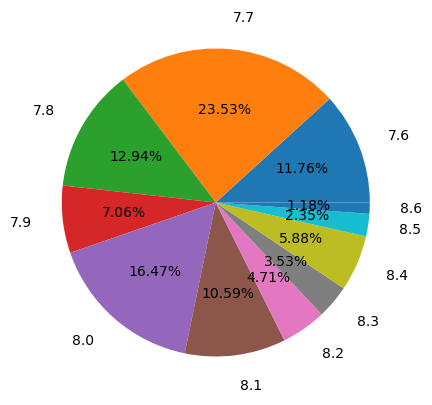

In [9]:
rating_eff = rating.value_counts(normalize=False, sort=False).sort_index()
rating_eff_cum = rating_eff.cumsum()
rating_freq = rating_eff / nb_indiv
rating_freq_cum = rating_freq.cumsum()
rating_df = pandas.concat([rating_eff, rating_eff_cum,rating_freq, rating_freq_cum], axis=1)
rating_df = pandas.DataFrame({ "effectifs": rating_eff, "effectifs_cumules": rating_eff_cum, "frequences": rating_freq, "frequences_cumulees": rating_freq_cum }) 
print("Tableau des effectifs et fréquences (cumulés) : \n", rating_df)
print('\n',"Diagramme circulaire :")
pie_chart = rating_eff.plot.pie(figsize=(5, 5), ylabel="",labeldistance=1.2, autopct='%1.2f%%')
for i in range(len(rating_eff)):
    print(pie_chart.patches[i])
plt.show()


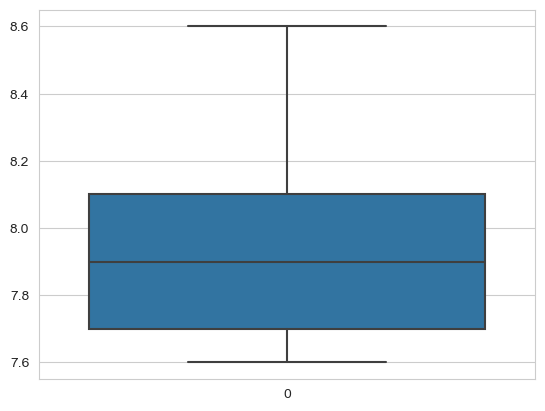

In [72]:
sns.boxplot(rating)
plt.show()

<Axes: title={'center': 'Nombre de films par rating'}, xlabel='Rating'>

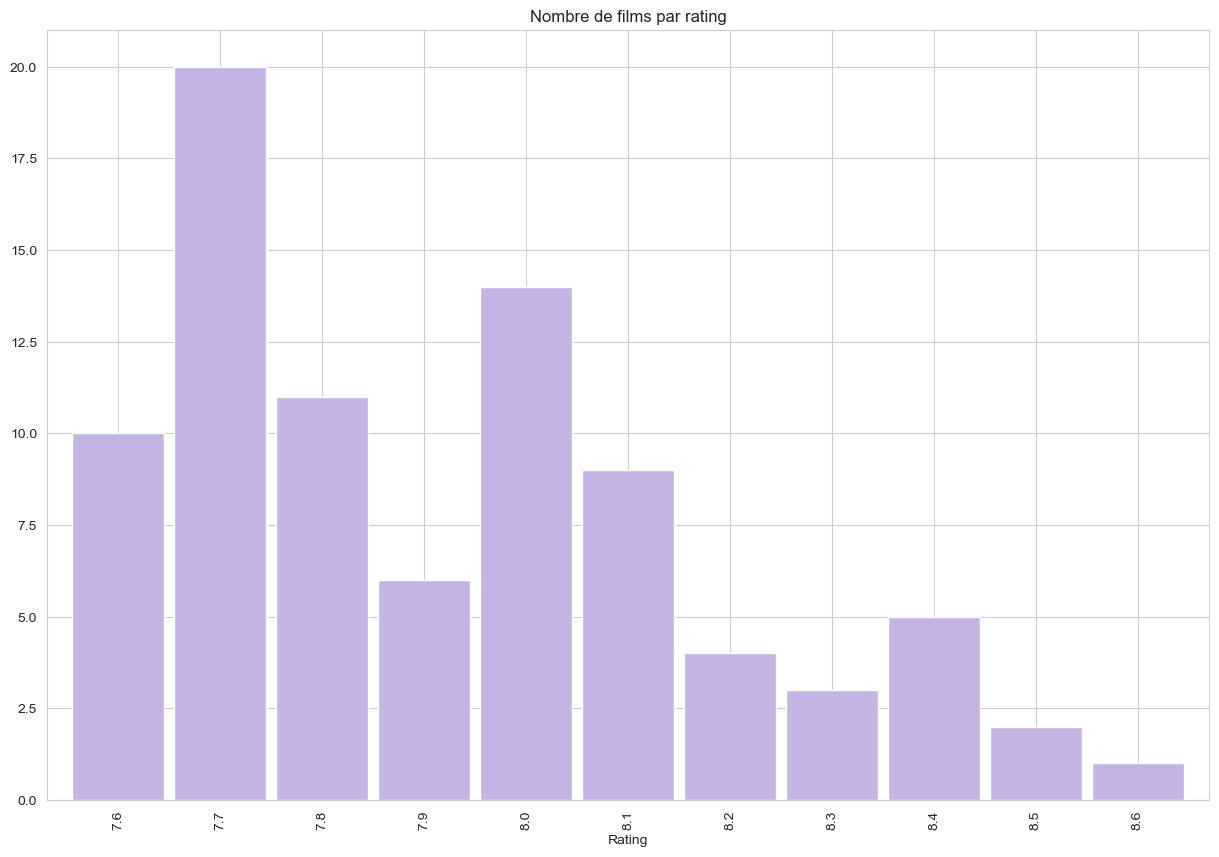

In [104]:
rating_eff.plot(kind='bar', color='#C5B4E3', title='Nombre de films par rating', figsize=(15, 10), width=0.9)

In [12]:
print(votes)
print("Le mode est ꞉", votes.mode()[0])
print("la moyenne de votes est :",votes.mean())
print("la mediane de votes est :",votes.median())
print("L'écart‑type est ꞉ ", votes.std())
print("La variance est ꞉ ", votes.var())
votes_max=votes.max()
print ("la valeur maximale de votes est :",votes_max)
votes_min=votes.min()
print ("la valeur minimale de votes est :",votes_min)
votes_etendue=votes_max -  votes_min
print("L'étendue est ꞉", votes_etendue)
quartile_1, quartile_3 = votes.quantile([1/4, 3/4])
print("Le 1er quartile est ꞉ ", quartile_1)
print("Le 3ème quartile est ꞉ ", quartile_3)

0      747148.0
1     1041158.0
2      272469.0
3      259975.0
4      510227.0
        ...    
80     463897.0
81     284542.0
82     260026.0
83     181528.0
84     197860.0
Name: Votes, Length: 85, dtype: float64
Le mode est ꞉ 25319.0
la moyenne de votes est : 300680.7411764706
la mediane de votes est : 197860.0
L'écart‑type est ꞉  285668.26585015876
La variance est ꞉  81606358113.83698
la valeur maximale de votes est : 1100175.0
la valeur minimale de votes est : 25319.0
L'étendue est ꞉ 1074856.0
Le 1er quartile est ꞉  66081.0
Le 3ème quartile est ꞉  447447.0


Tableau des effectifs et fréquences (cumulés) : 
            effectifs  effectifs_cumules  frequences  frequences_cumulees
Votes                                                                   
25319.0            1                  1    0.011765             0.011765
25421.0            1                  2    0.011765             0.023529
27232.0            1                  3    0.011765             0.035294
27967.0            1                  4    0.011765             0.047059
31226.0            1                  5    0.011765             0.058824
...              ...                ...         ...                  ...
979994.0           1                 81    0.011765             0.952941
1029395.0          1                 82    0.011765             0.964706
1031038.0          1                 83    0.011765             0.976471
1041158.0          1                 84    0.011765             0.988235
1100175.0          1                 85    0.011765             1.000000



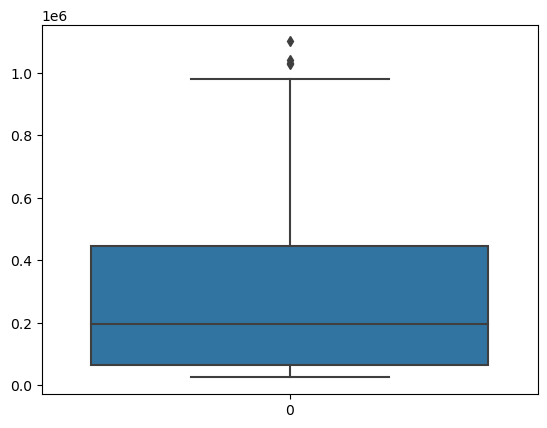

In [9]:
votes_eff = votes.value_counts(normalize=False, sort=False).sort_index()
votes_eff_cum = votes_eff.cumsum()
votes_freq = votes_eff / nb_indiv
votes_freq_cum = votes_freq.cumsum()
votes_df = pandas.concat([votes_eff, votes_eff_cum,votes_freq, votes_freq_cum], axis=1)
votes_df = pandas.DataFrame({ "effectifs": votes_eff, "effectifs_cumules": votes_eff_cum, "frequences": votes_freq, "frequences_cumulees": votes_freq_cum }) 
print("Tableau des effectifs et fréquences (cumulés) : \n", votes_df)
sns.boxplot(votes)
plt.show()


<Axes: title={'center': 'Nombre de films par votes'}, xlabel='Votes'>

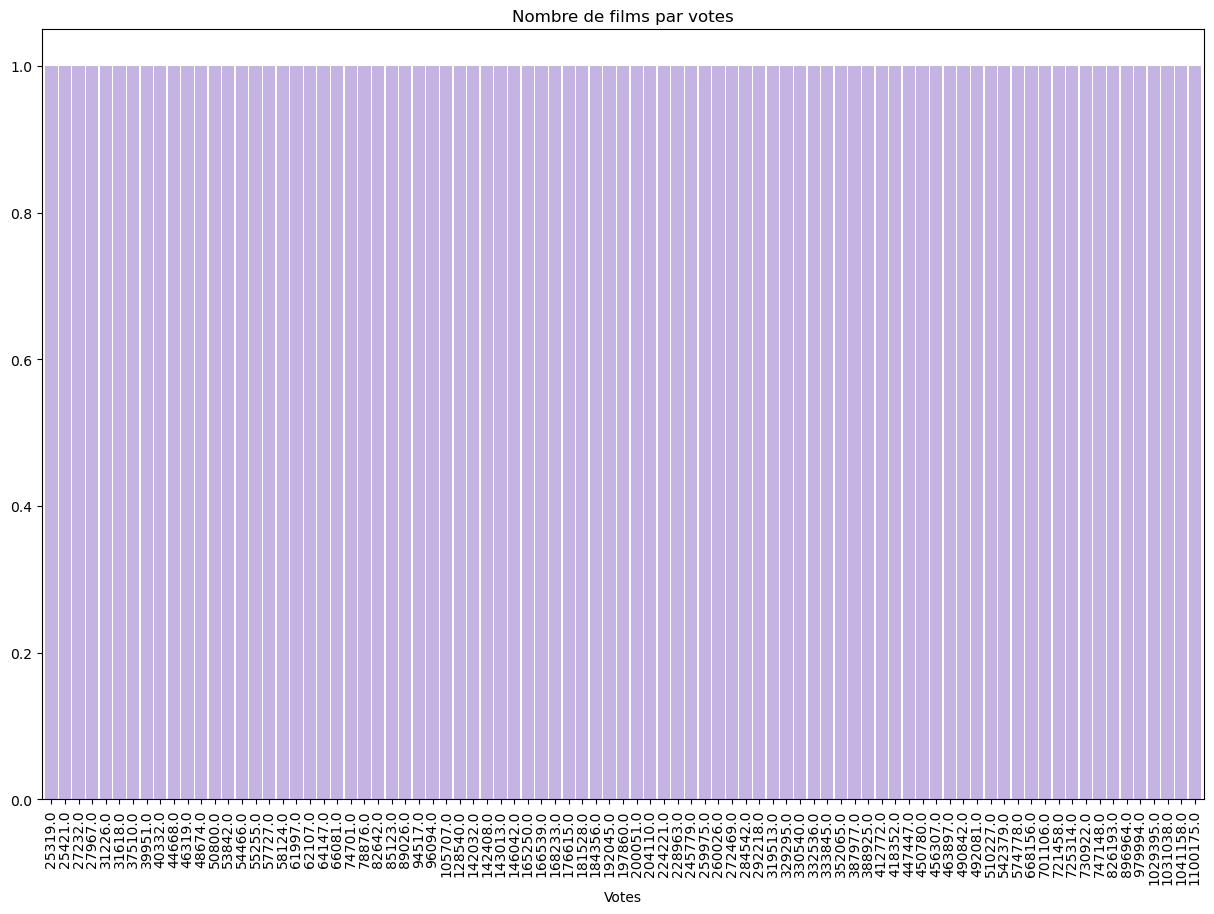

In [10]:
votes_eff.plot(kind='bar', color='#C5B4E3', title='Nombre de films par votes', figsize=(15, 10), width=0.9)

In [11]:
print(gross)
print("Le mode est ꞉", gross.mode()[0])
print("la moyenne de gross est :",gross.mean())
print("la mediane de gross est :",gross.median())
print("L'écart‑type est ꞉ ", gross.std())
print("La variance est ꞉ ", gross.var())
gross_max=gross.max()
print ("la valeur maximale de gross est :",gross_max)
gross_min=gross.min()
print ("la valeur minimale de gross est :",gross_min)
gross_etendue=gross_max -  gross_min
print("L'étendue est ꞉", gross_etendue)
quartile_1, quartile_3 = gross.quantile([1/4, 3/4])
print("Le 1er quartile est ꞉ ", quartile_1)
print("Le 3ème quartile est ꞉ ", quartile_3)

0      10.06
1     422.78
2        NaN
3       5.02
4     190.24
       ...  
80    215.43
81    120.62
82    111.54
83    141.84
84    184.93
Name: Gross, Length: 85, dtype: float64
Le mode est ꞉ 0.19
la moyenne de gross est : 146.7416
la mediane de gross est : 131.23000000000002
L'écart‑type est ꞉  148.8207454454478
La variance est ꞉  22147.614274938776
la valeur maximale de gross est : 608.58
la valeur minimale de gross est : 0.19
L'étendue est ꞉ 608.39
Le 1er quartile est ꞉  5.0675
Le 3ème quartile est ꞉  222.2525


In [11]:
gross_eff = gross.value_counts(normalize=False, sort=False).sort_index()
gross_eff_cum = gross_eff.cumsum()
gross_freq = gross_eff / nb_indiv
gross_freq_cum = gross_freq.cumsum()
gross_df = pandas.concat([gross_eff, gross_eff_cum,gross_freq, gross_freq_cum], axis=1)
gross_df = pandas.DataFrame({ "effectifs": gross_eff, "effectifs_cumules": gross_eff_cum, "frequences": gross_freq, "frequences_cumulees": gross_freq_cum }) 
print("Tableau des effectifs et fréquences (cumulés) : \n", gross_df)

Tableau des effectifs et fréquences (cumulés) : 
         effectifs  effectifs_cumules  frequences  frequences_cumulees
Gross                                                                
0.19            2                  2    0.023529             0.023529
0.29            1                  3    0.011765             0.035294
0.31            1                  4    0.011765             0.047059
0.77            1                  5    0.011765             0.058824
0.88            1                  6    0.011765             0.070588
1.00            1                  7    0.011765             0.082353
1.11            1                  8    0.011765             0.094118
1.34            1                  9    0.011765             0.105882
2.38            1                 10    0.011765             0.117647
2.89            1                 11    0.011765             0.129412
4.71            1                 12    0.011765             0.141176
5.02            1                 13    

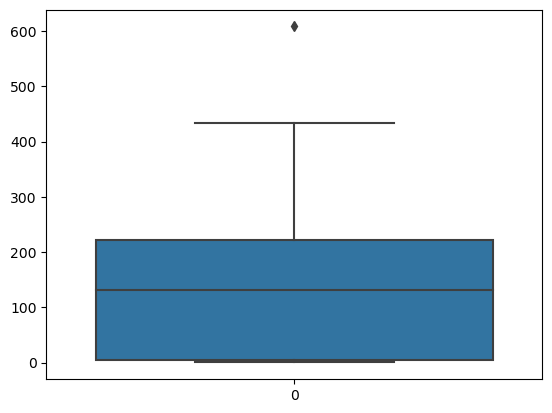

In [9]:
sns.boxplot(gross)
plt.show()

<Axes: title={'center': 'Nombre de films par gross'}, xlabel='Gross'>

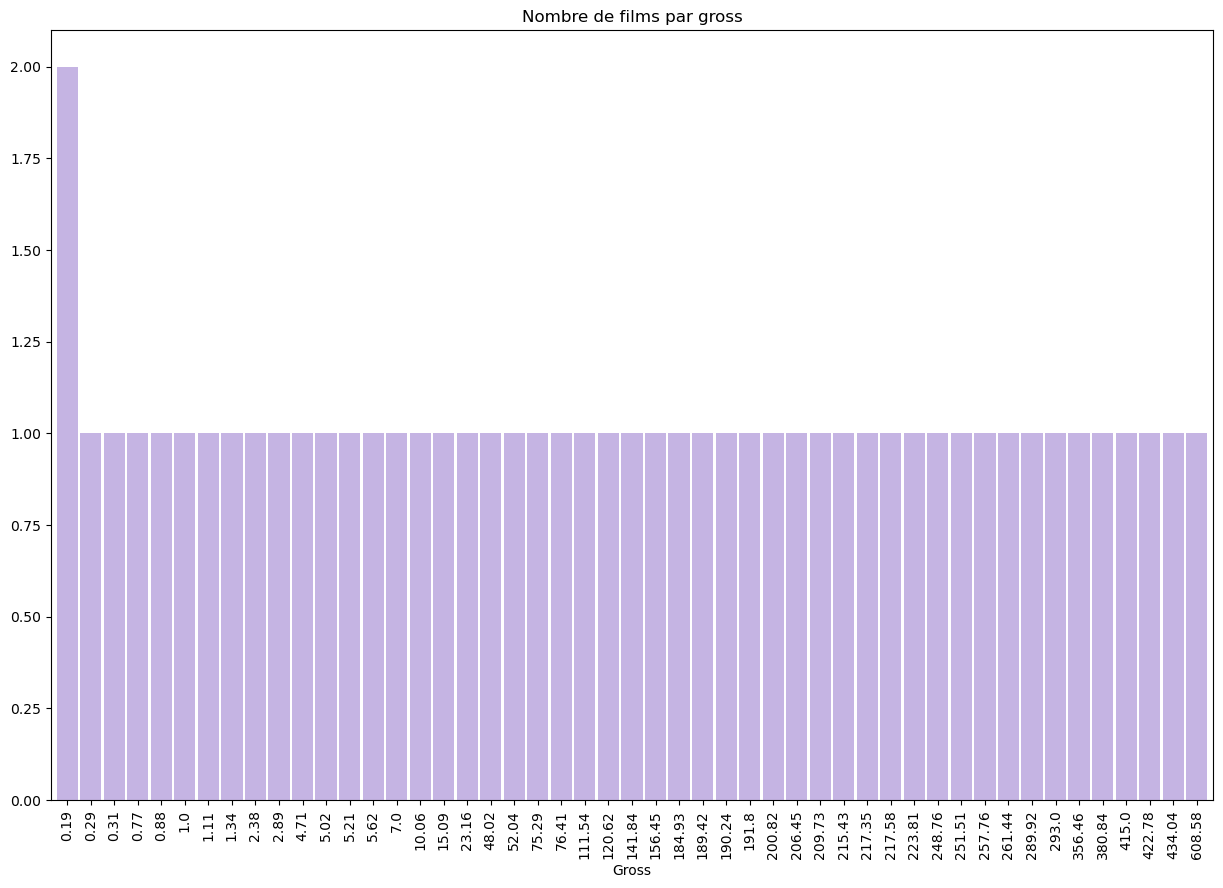

In [12]:
gross_eff.plot(kind='bar', color='#C5B4E3', title='Nombre de films par gross', figsize=(15, 10), width=0.9)

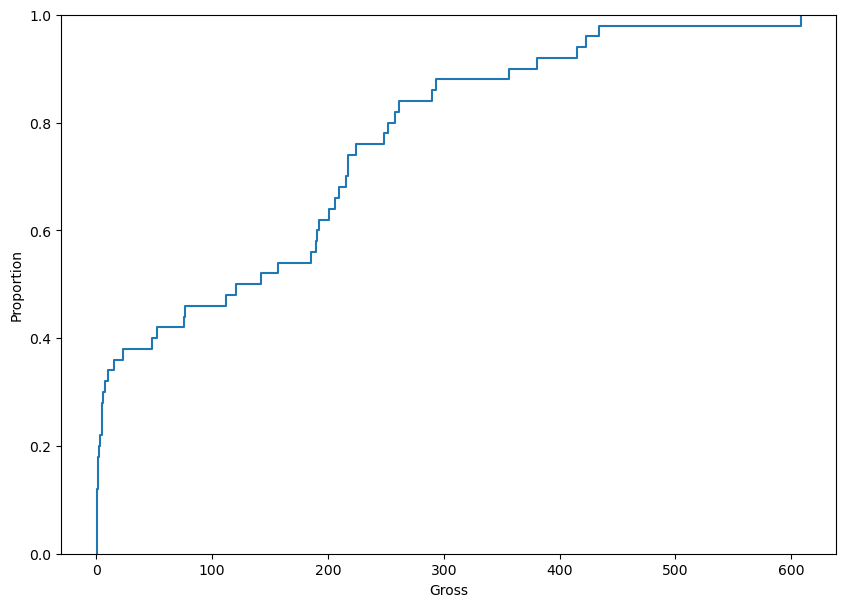

In [16]:
fig=plt.subplots(figsize=(10,7))
sns.ecdfplot(data=gross_eff,x=gross)
plt.show()

In [70]:
print(metascore)
print("Le mode est ꞉", metascore.mode()[0])
print("la moyenne de metascore est :",metascore.mean())
print("la mediane de metascore est :",metascore.median())
print("L'écart‑type est ꞉ ", metascore.std())
print("La variance est ꞉ ", metascore.var())
metascore_max=metascore.max()
print ("la valeur maximale de metascore est :",metascore_max)
metascore_min=metascore.min()
print ("la valeur minimale de metascore est :",metascore_min)
metascore_etendue=metascore_max -  metascore_min
print("L'étendue est ꞉", metascore_etendue)
quartile_1, quartile_3 = metascore.quantile([1/4, 3/4])
print("Le 1er quartile est ꞉ ", quartile_1)
print("Le 3ème quartile est ꞉ ", quartile_3)

0     96.0
1     88.0
2     94.0
3     79.0
4     87.0
      ... 
80    74.0
81    71.0
82    88.0
83    65.0
84    95.0
Name: Metascore, Length: 85, dtype: float64
Le mode est ꞉ 83.0
la moyenne de metascore est : 80.85
la mediane de metascore est : 82.0
L'écart‑type est ꞉  8.96561645850483
La variance est ꞉  80.38227848101268
la valeur maximale de metascore est : 96.0
la valeur minimale de metascore est : 59.0
L'étendue est ꞉ 37.0
Le 1er quartile est ꞉  74.0
Le 3ème quartile est ꞉  87.0


In [21]:
metascore_eff = metascore.value_counts(normalize=False, sort=False).sort_index()
metascore_eff_cum = metascore_eff.cumsum()
metascore_freq = metascore_eff / nb_indiv
metascore_freq_cum = metascore_freq.cumsum()
metascore_df = pandas.concat([metascore_eff, metascore_eff_cum,metascore_freq, metascore_freq_cum], axis=1)
metascore_df = pandas.DataFrame({ "effectifs": metascore_eff, "effectifs_cumules": metascore_eff_cum, "frequences": metascore_freq, "frequences_cumulees": metascore_freq_cum }) 
print("Tableau des effectifs et fréquences (cumulés) : \n", metascore_df)

Tableau des effectifs et fréquences (cumulés) : 
            effectifs  effectifs_cumules  frequences  frequences_cumulees
Metascore                                                               
59.0               1                  1    0.011765             0.011765
61.0               1                  2    0.011765             0.023529
62.0               1                  3    0.011765             0.035294
65.0               3                  6    0.035294             0.070588
67.0               1                  7    0.011765             0.082353
70.0               2                  9    0.023529             0.105882
71.0               3                 12    0.035294             0.141176
72.0               4                 16    0.047059             0.188235
73.0               3                 19    0.035294             0.223529
74.0               2                 21    0.023529             0.247059
75.0               2                 23    0.023529             0.270588
7

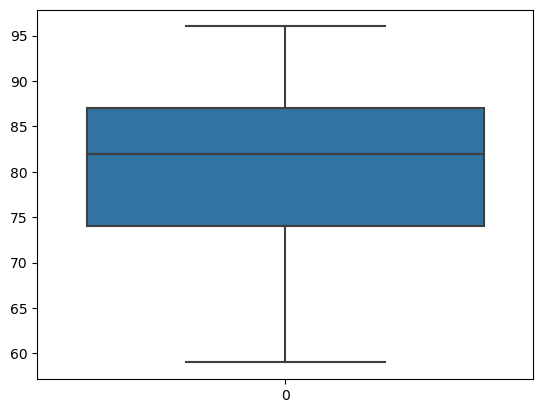

In [22]:
sns.boxplot(metascore)
plt.show()

<Axes: title={'center': 'Nombre de films par metascore'}, xlabel='Metascore'>

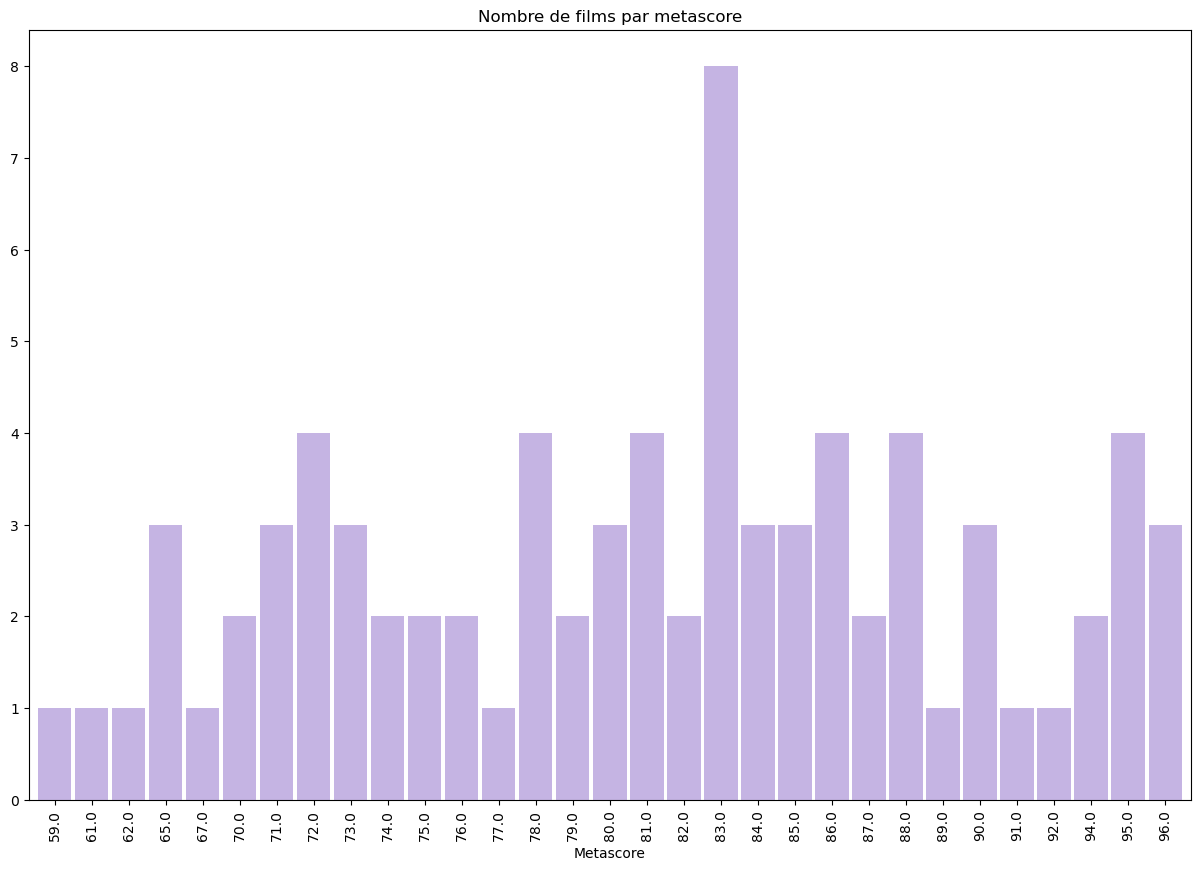

In [23]:
metascore_eff.plot(kind='bar', color='#C5B4E3', title='Nombre de films par metascore', figsize=(15, 10), width=0.9)

In [71]:
print(certificate)
print("Le mode est ꞉", certificate.mode()[0])
certificate_eff = certificate.value_counts(normalize=False, sort=False).sort_index()
certificate_eff_cum = certificate_eff.cumsum()
certificate_freq = certificate_eff / nb_indiv
certificate_freq_cum = certificate_freq.cumsum()
certificate_df = pandas.concat([certificate_eff, certificate_eff_cum,certificate_freq,certificate_freq_cum], axis=1)
certificate_df = pandas.DataFrame({ "effectifs": certificate_eff, "effectifs_cumules": certificate_eff_cum, "frequences": certificate_freq, "frequences_cumulees": certificate_freq_cum }) 
print("Tableau des effectifs et fréquences (cumulés) : \n", certificate_df)

0     U
1     U
2     U
3     U
4     U
     ..
80    U
81    U
82    U
83    U
84    U
Name: Certificate, Length: 85, dtype: object
Le mode est ꞉ U
Tableau des effectifs et fréquences (cumulés) : 
              effectifs  effectifs_cumules  frequences  frequences_cumulees
Certificate                                                               
13                   1                  1    0.011765             0.011765
16                   1                  2    0.011765             0.023529
7                    1                  3    0.011765             0.035294
A                    3                  6    0.035294             0.070588
Not Rated            2                  8    0.023529             0.094118
PG                   4                 12    0.047059             0.141176
PG-13                3                 15    0.035294             0.176471
R                    1                 16    0.011765             0.188235
U                   60                 76    0.7058


 Diagramme circulaire :
Wedge(center=(0, 0), r=1, theta1=0, theta2=4.28571, width=None)
Wedge(center=(0, 0), r=1, theta1=4.28571, theta2=8.57143, width=None)
Wedge(center=(0, 0), r=1, theta1=8.57143, theta2=12.8571, width=None)
Wedge(center=(0, 0), r=1, theta1=12.8571, theta2=25.7143, width=None)
Wedge(center=(0, 0), r=1, theta1=25.7143, theta2=34.2857, width=None)
Wedge(center=(0, 0), r=1, theta1=34.2857, theta2=51.4286, width=None)
Wedge(center=(0, 0), r=1, theta1=51.4286, theta2=64.2857, width=None)
Wedge(center=(0, 0), r=1, theta1=64.2857, theta2=68.5714, width=None)
Wedge(center=(0, 0), r=1, theta1=68.5714, theta2=325.714, width=None)
Wedge(center=(0, 0), r=1, theta1=325.714, theta2=360, width=None)


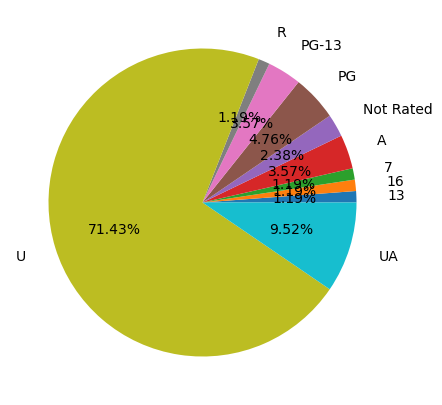

In [31]:
print('\n',"Diagramme circulaire :")
pie_chart = certificate_eff.plot.pie(figsize=(5, 5), ylabel="",labeldistance=1.2, autopct='%1.2f%%')
for i in range(len(certificate_eff)):
    print(pie_chart.patches[i])
plt.show()

<Axes: title={'center': 'Nombre de films par certificate'}, xlabel='Certificate'>

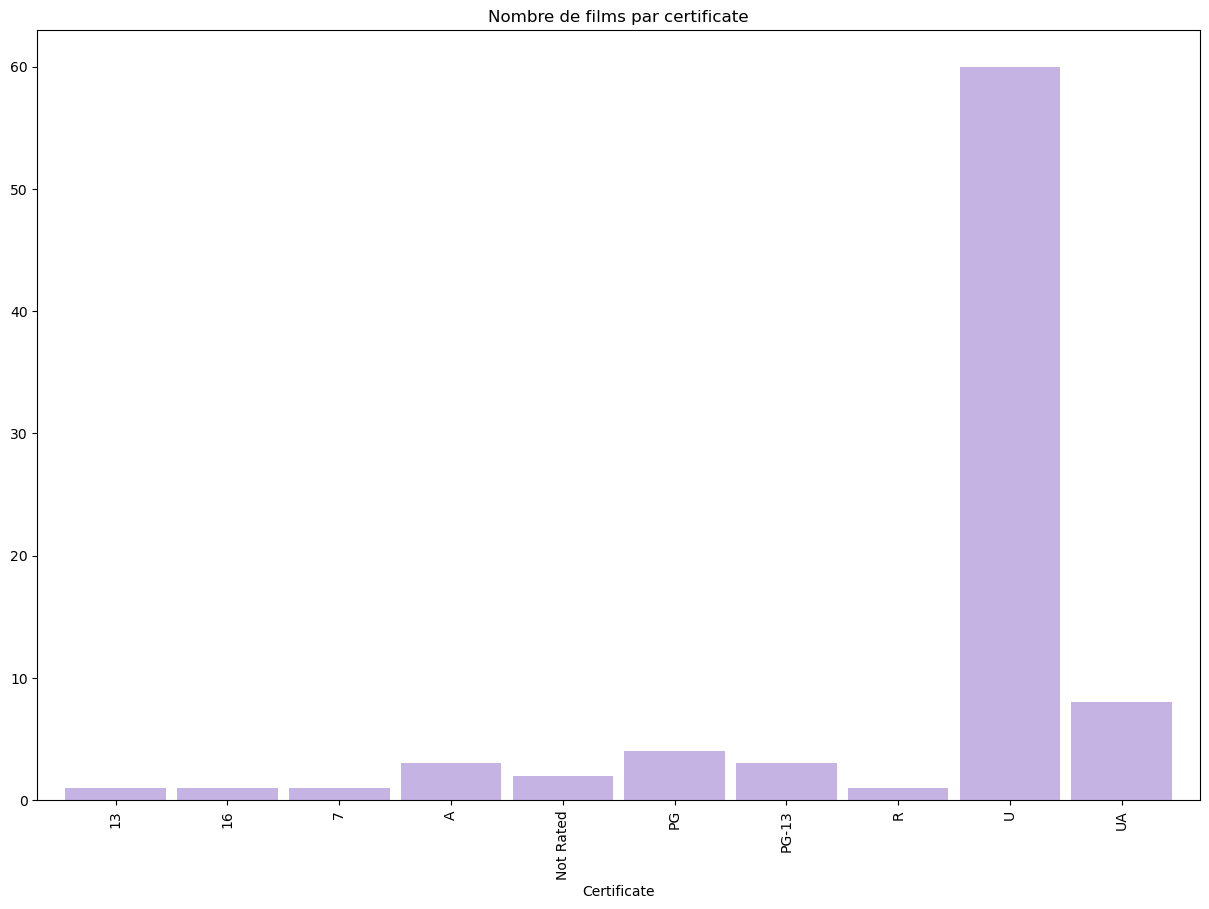

In [32]:
certificate_eff.plot(kind='bar', color='#C5B4E3', title='Nombre de films par certificate', figsize=(15, 10), width=0.9)

In [39]:
print(director)
print("Le mode est ꞉", director.mode()[0])
director_eff = director.value_counts(normalize=False, sort=False).sort_index()
director_eff_cum = director_eff.cumsum()
director_freq = director_eff / nb_indiv
director_freq_cum = director_freq.cumsum()
director_df = pandas.concat([director_eff, director_eff_cum,director_freq,director_freq_cum], axis=1)
director_df = pandas.DataFrame({ "effectifs": director_eff, "effectifs_cumules": director_eff_cum, "frequences": director_freq, "frequences_cumulees": director_freq_cum }) 
print("Tableau des effectifs et fréquences (cumulés) : \n", director_df)

0          Hayao Miyazaki
1            Roger Allers
2           Isao Takahata
3          Makoto Shinkai
4         Bob Persichetti
             ...         
80           Mark Osborne
81          Tony Bancroft
82           Ron Clements
83    Wolfgang Reitherman
84       William Cottrell
Name: Director, Length: 85, dtype: object
Le mode est ꞉ Hayao Miyazaki
Tableau des effectifs et fréquences (cumulés) : 
                       effectifs  effectifs_cumules  frequences  \
Director                                                         
Adam Elliot                   1                  1    0.011765   
Andrew Adamson                1                  2    0.011765   
Andrew Stanton                2                  4    0.023529   
Bob Persichetti               1                  5    0.011765   
Brad Bird                     4                  9    0.047059   
Byron Howard                  1                 10    0.011765   
Claude Barras                 1                 11    0.011765   

In [36]:
print("Tableau des effectifs et fréquences (cumulés) : \n", director_df)

Tableau des effectifs et fréquences (cumulés) : 
                       effectifs  effectifs_cumules  frequences  \
Director                                                         
Adam Elliot                   1                  1    0.011765   
Andrew Adamson                1                  2    0.011765   
Andrew Stanton                2                  4    0.023529   
Bob Persichetti               1                  5    0.011765   
Brad Bird                     4                  9    0.047059   
Byron Howard                  1                 10    0.011765   
Claude Barras                 1                 11    0.011765   
Dean DeBlois                  2                 13    0.023529   
Don Hall                      1                 14    0.011765   
Dorota Kobiela                1                 15    0.011765   
Gary Trousdale                1                 16    0.011765   
Haruo Sotozaki                1                 17    0.011765   
Hayao Miyazaki            

In [15]:
print(year)
print("Le mode est ꞉", year.mode()[0])
print("la moyenne de l'année est :",year.mean())
print("la mediane de l'année est :",year.median())
print("L'écart‑type est ꞉ ",year.std())
print("La variance est ꞉ ", year.var())
year_max=year.max()
print ("la valeur maximale d'année' est :",year_max)
year_min=year.min()
print ("la valeur minimale d'année est :",year_min)
year_etendue=year_max -  year_min
print("L'étendue est ꞉", year_etendue)
quartile_1, quartile_3 = year.quantile([1/4, 3/4])
print("Le 1er quartile est ꞉ ", quartile_1)
print("Le 3ème quartile est ꞉ ", quartile_3)

0     2001
1     1994
2     1988
3     2016
4     2018
      ... 
80    2008
81    1998
82    1989
83    1967
84    1937
Name: Year, Length: 85, dtype: int64
Le mode est ꞉ 2001
la moyenne de l'année est : 2003.2117647058824
la mediane de l'année est : 2007.0
L'écart‑type est ꞉  15.2558295787038
La variance est ꞉  232.74033613445374
la valeur maximale d'année' est : 2021
la valeur minimale d'année est : 1937
L'étendue est ꞉ 84
Le 1er quartile est ꞉  1995.0
Le 3ème quartile est ꞉  2014.0


In [38]:
year_eff = year.value_counts(normalize=False, sort=False).sort_index()
year_eff_cum = year_eff.cumsum()
year_freq = year_eff / nb_indiv
year_freq_cum = year_freq.cumsum()
year_df = pandas.concat([year_eff, year_eff_cum,year_freq,year_freq_cum], axis=1)
year_df = pandas.DataFrame({ "effectifs": year_eff, "effectifs_cumules": year_eff_cum, "frequences": year_freq, "frequences_cumulees": year_freq_cum }) 
print("Tableau des effectifs et fréquences (cumulés) : \n", year_df)

Tableau des effectifs et fréquences (cumulés) : 
       effectifs  effectifs_cumules  frequences  frequences_cumulees
Year                                                               
1937          1                  1    0.011765             0.011765
1940          1                  2    0.011765             0.023529
1967          1                  3    0.011765             0.035294
1973          1                  4    0.011765             0.047059
1984          1                  5    0.011765             0.058824
1986          1                  6    0.011765             0.070588
1988          4                 10    0.047059             0.117647
1989          2                 12    0.023529             0.141176
1991          1                 13    0.011765             0.152941
1992          2                 15    0.023529             0.176471
1993          3                 18    0.035294             0.211765
1994          1                 19    0.011765             0.22352

<Axes: title={'center': 'Nombre de films par année'}, xlabel='Year'>

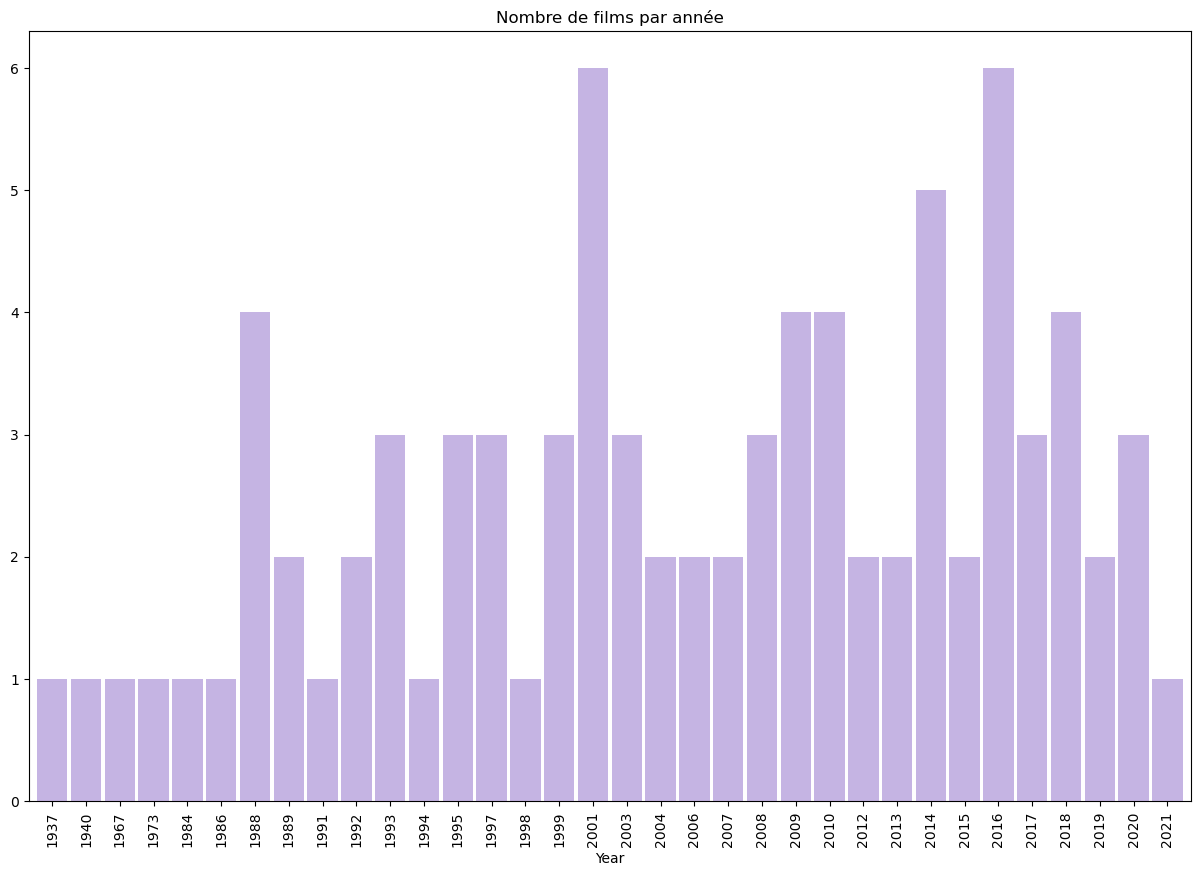

In [40]:
year_eff.plot(kind='bar', color='#C5B4E3', title='Nombre de films par année', figsize=(15, 10), width=0.9)

In [72]:
print(genre)
print("Le mode est ꞉", genre.mode()[0])
genre_eff = genre.value_counts(normalize=False, sort=False).sort_index()
genre_eff_cum = genre_eff.cumsum()
genre_freq = genre_eff / nb_indiv
genre_freq_cum = genre_freq.cumsum()
genre_df = pandas.concat([genre_eff, genre_eff_cum,genre_freq,genre_freq_cum], axis=1)
genre_df = pandas.DataFrame({ "effectifs": genre_eff, "effectifs_cumules": genre_eff_cum, "frequences": genre_freq, "frequences_cumulees": genre_freq_cum }) 
print("Tableau des effectifs et fréquences (cumulés) : \n", genre_df)

0      Adventure, Family
1       Adventure, Drama
2             Drama, War
3         Drama, Fantasy
4      Action, Adventure
             ...        
80     Action, Adventure
81     Adventure, Comedy
82     Adventure, Comedy
83     Adventure, Comedy
84     Adventure, Family
Name: Genre, Length: 85, dtype: object
Le mode est ꞉  Adventure, Comedy
Tableau des effectifs et fréquences (cumulés) : 
                      effectifs  effectifs_cumules  frequences  \
Genre                                                           
 Action, Adventure          14                 14    0.164706   
 Action, Crime               2                 16    0.023529   
 Action, Drama               2                 18    0.023529   
 Adventure, Comedy          30                 48    0.352941   
 Adventure, Drama            3                 51    0.035294   
 Adventure, Family           7                 58    0.082353   
 Adventure, Fantasy          1                 59    0.011765   
 Adventure, Sci-Fi

<Axes: title={'center': 'Nombre de films par genre'}, xlabel='Genre'>

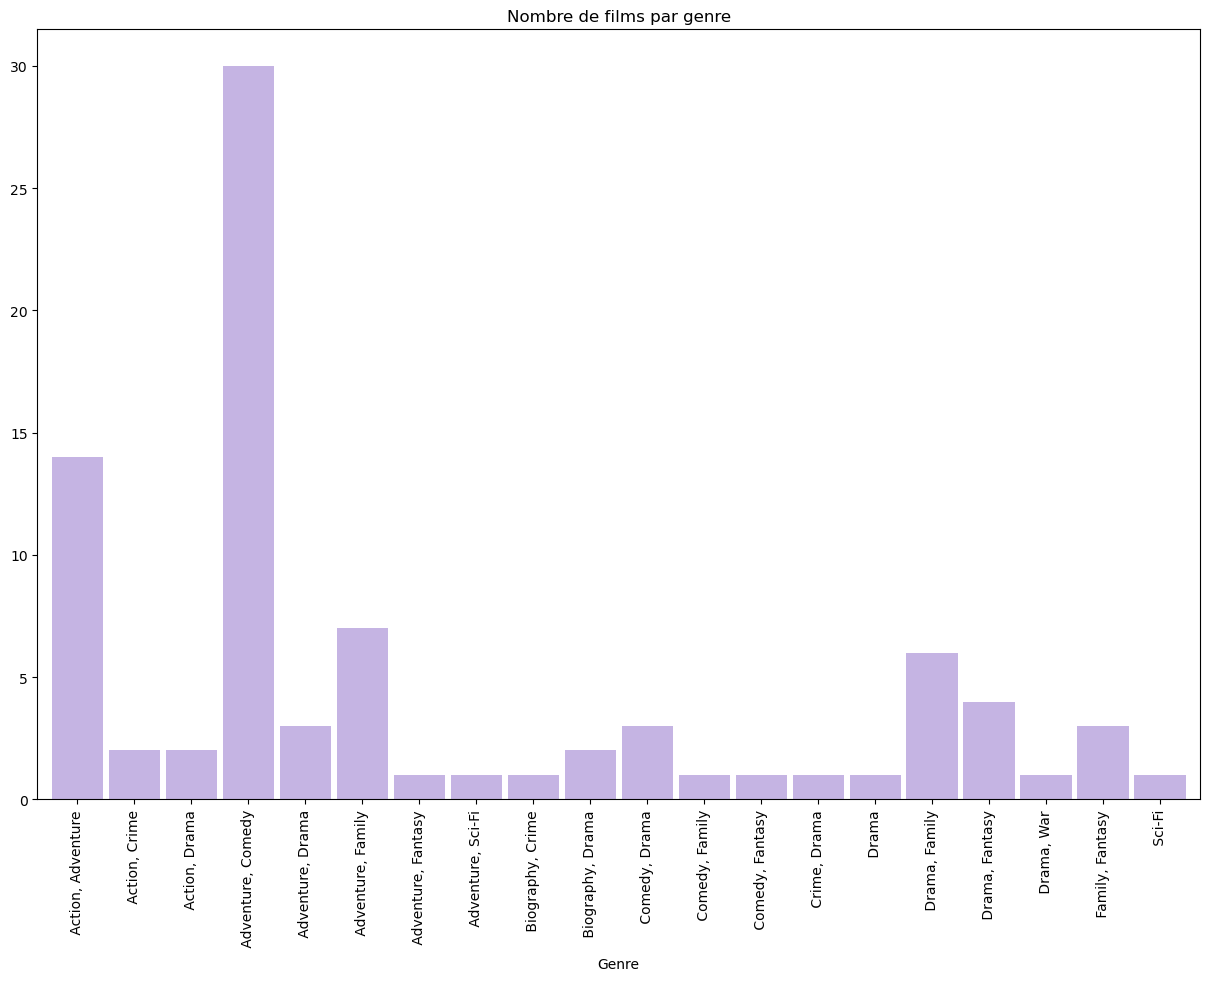

In [73]:
genre_eff.plot(kind='bar', color='#C5B4E3', title='Nombre de films par genre', figsize=(15, 10), width=0.9)

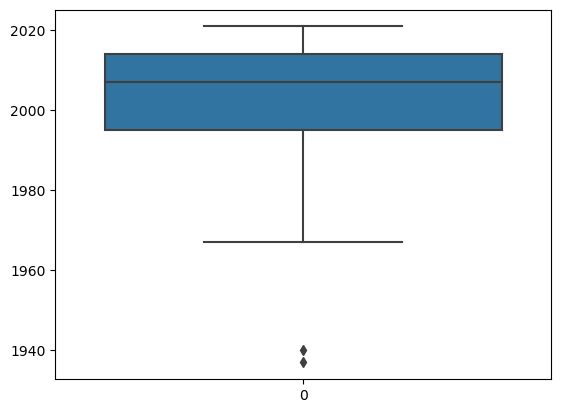

In [48]:
sns.boxplot(year)
plt.show()

In [17]:
print(runtime)
print("Le mode est ꞉", runtime.mode()[0])
print("la moyenne de runtime est :",runtime.mean())
print("la mediane de runtime est :",runtime.median())
print("L'écart‑type est ꞉ ", runtime.std())
print("La variance est ꞉ ", runtime.var())
runtime_max=runtime.max()
print ("la valeur maximale de runtime est :",runtime_max)
runtime_min=runtime.min()
print ("la valeur minimale de runtime est :",runtime_min)
runtime_etendue=runtime_max -  runtime_min
print("L'étendue est ꞉", runtime_etendue)
quartile_1, quartile_3 = runtime.quantile([1/4, 3/4])
print("Le 1er quartile est ꞉ ", quartile_1)
print("Le 3ème quartile est ꞉ ", quartile_3)

0     125.0
1      88.0
2      89.0
3     106.0
4     117.0
      ...  
80     92.0
81     88.0
82     83.0
83     78.0
84     83.0
Name: Runtime, Length: 85, dtype: float64
Le mode est ꞉ 100.0
la moyenne de runtime est : 99.3529411764706
la mediane de runtime est : 99.0
L'écart‑type est ꞉  14.63744861513728
La variance est ꞉  214.2549019607843
la valeur maximale de runtime est : 137.0
la valeur minimale de runtime est : 66.0
L'étendue est ꞉ 71.0
Le 1er quartile est ꞉  90.0
Le 3ème quartile est ꞉  107.0


In [13]:
runtime_eff = runtime.value_counts(normalize=False, sort=False).sort_index()
runtime_eff_cum = runtime_eff.cumsum()
runtime_freq = runtime_eff / nb_indiv
runtime_freq_cum = runtime_freq.cumsum()
runtime_df = pandas.concat([runtime_eff, runtime_eff_cum,runtime_freq,runtime_freq_cum], axis=1)
runtime_df = pandas.DataFrame({ "effectifs": runtime_eff, "effectifs_cumules": runtime_eff_cum, "frequences": runtime_freq, "frequences_cumulees": runtime_freq_cum }) 
print("Tableau des effectifs et fréquences (cumulés) : \n", runtime_df)

Tableau des effectifs et fréquences (cumulés) : 
          effectifs  effectifs_cumules  frequences  frequences_cumulees
Runtime                                                               
66.0             1                  1    0.011765             0.011765
72.0             1                  2    0.011765             0.023529
76.0             2                  4    0.023529             0.047059
78.0             1                  5    0.011765             0.058824
80.0             1                  6    0.011765             0.070588
81.0             3                  9    0.035294             0.105882
83.0             3                 12    0.035294             0.141176
84.0             1                 13    0.011765             0.152941
86.0             2                 15    0.023529             0.176471
87.0             3                 18    0.035294             0.211765
88.0             2                 20    0.023529             0.235294
89.0             1         

<Axes: title={'center': 'Nombre de films par runtime'}, xlabel='Runtime'>

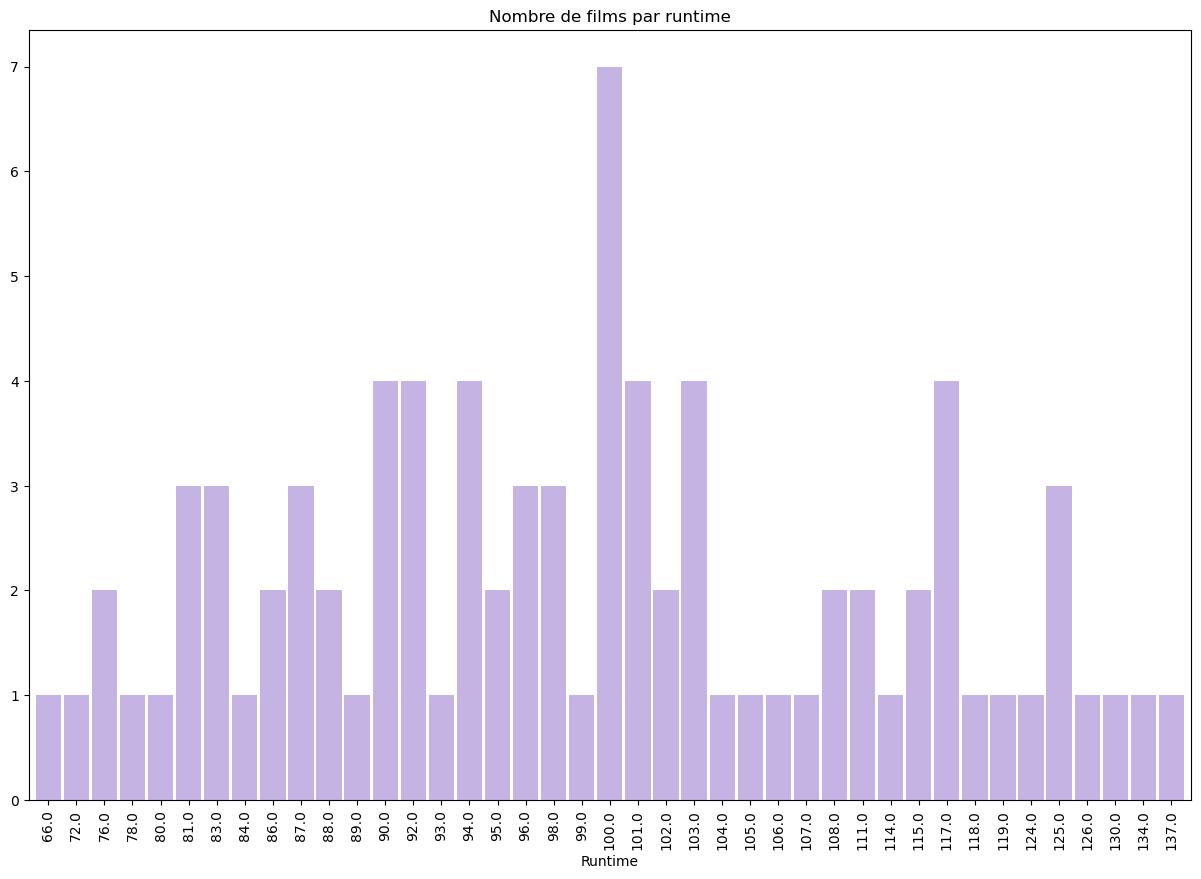

In [14]:
runtime_eff.plot(kind='bar', color='#C5B4E3', title='Nombre de films par runtime', figsize=(15, 10), width=0.9)

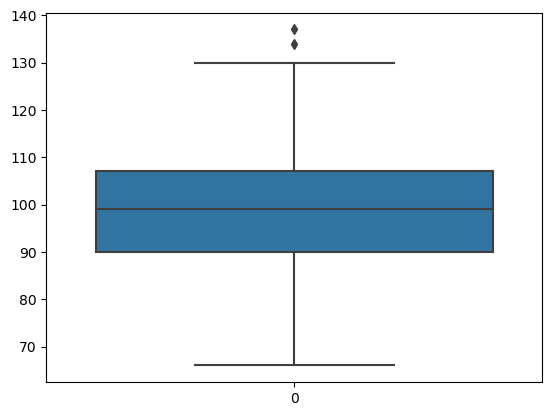

In [12]:
sns.boxplot(runtime)
plt.show()

Text(0, 0.5, 'Count')

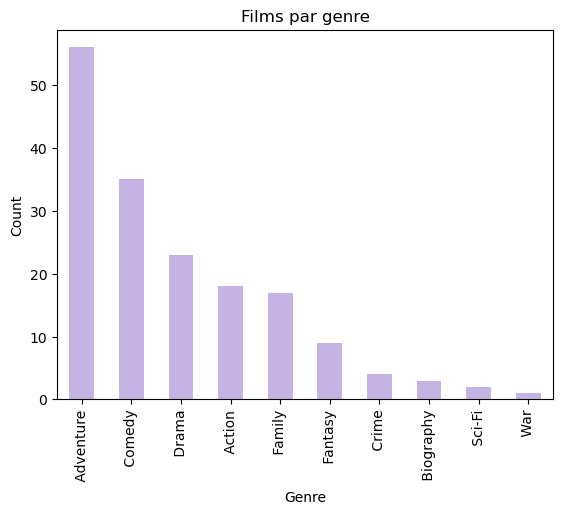

In [74]:

# get genre keywords foreach movie
data['Genre'] = data['Genre'].str.split(',')
data = data.explode('Genre')
# plot genre histogram
data['Genre'].value_counts().plot(kind='bar',color='#C5B4E3', title='Nombre de films par genre')
plt.title('Films par genre')
plt.xlabel('Genre')
plt.ylabel('Count')

<Axes: title={'center': 'Nombre de votes par films'}>

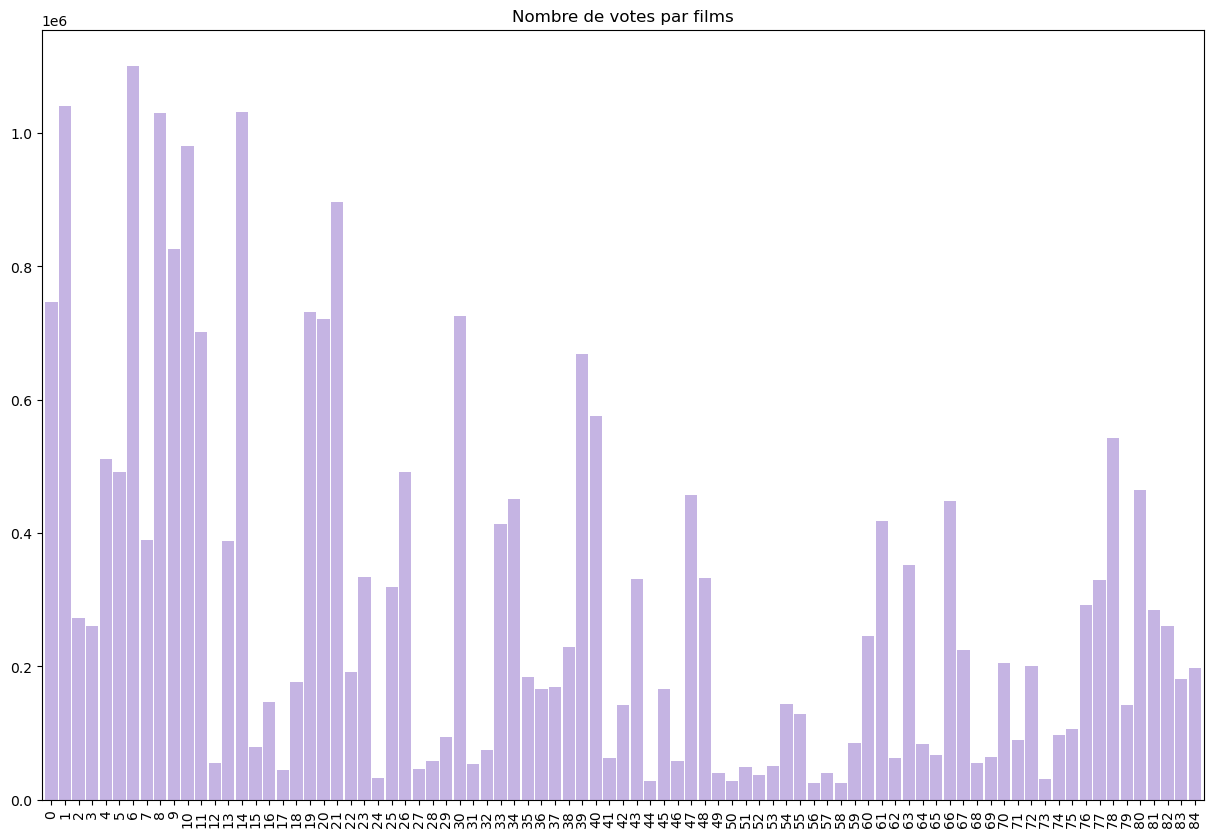

In [17]:
votes.plot(kind='bar', color='#C5B4E3', title='Nombre de votes par films', figsize=(15, 10), width=0.9)

<Axes: xlabel='Year', ylabel='Genre'>

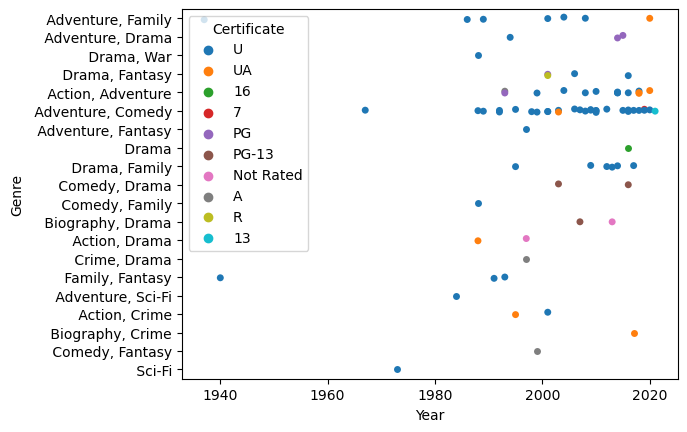

In [75]:
sns.stripplot(data=donnees,x=year,y='Genre',hue=certificate)

<Axes: xlabel='Year', ylabel='Genre'>

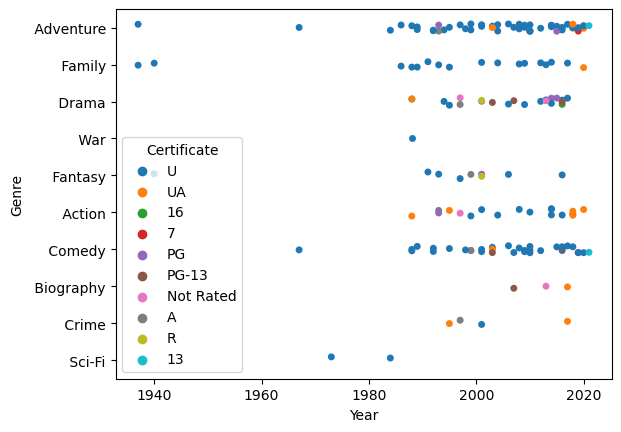

In [77]:
data['Genre'] = data['Genre'].str.split(',')
data = data.explode('Genre')
# plot genre histogram
sns.stripplot(data=donnees,x=year,y=data['Genre'],hue=certificate)


<Axes: xlabel='Year', ylabel='Rating'>

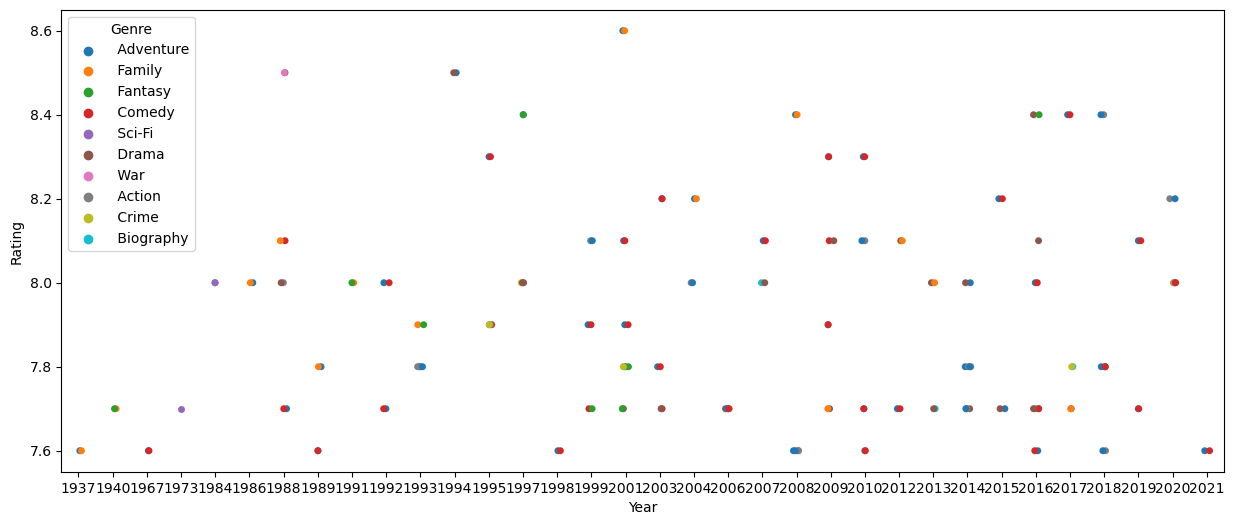

In [79]:
plt.figure(figsize=(15,6))
# plot genre histogram
plot.xtricks(rota)
sns.stripplot(data=donnees,x='Year',y=rating,hue=data['Genre'])

<Axes: xlabel='Year', ylabel='Rating'>

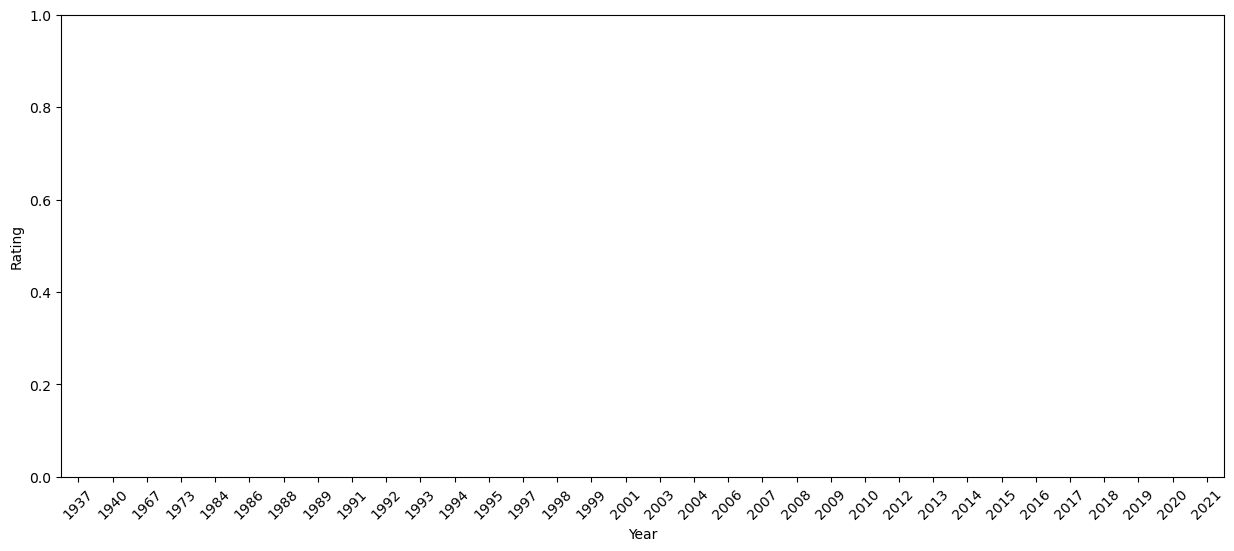

In [90]:
data['Genre'] = data['Genre'].str.split(',')
data = data.explode('Genre')
# plot genre histogram
plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
sns.stripplot(data=donnees,x='Year',y=rating,hue=data['Genre'])

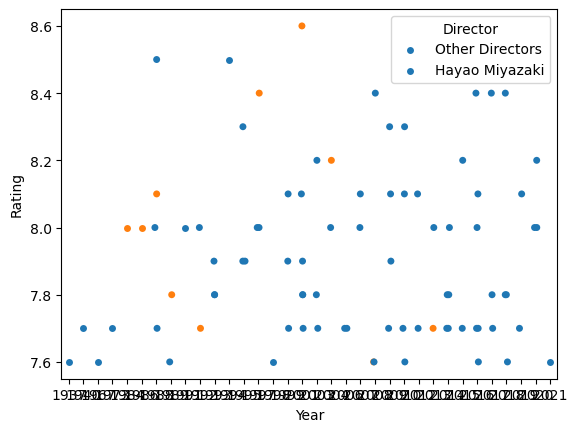

In [42]:
sns.stripplot(data=donnees, x=year, y=rating, hue=(donnees['Director'] == 'Hayao Miyazaki'))
plt.legend(title='Director', labels=['Other Directors', 'Hayao Miyazaki'])

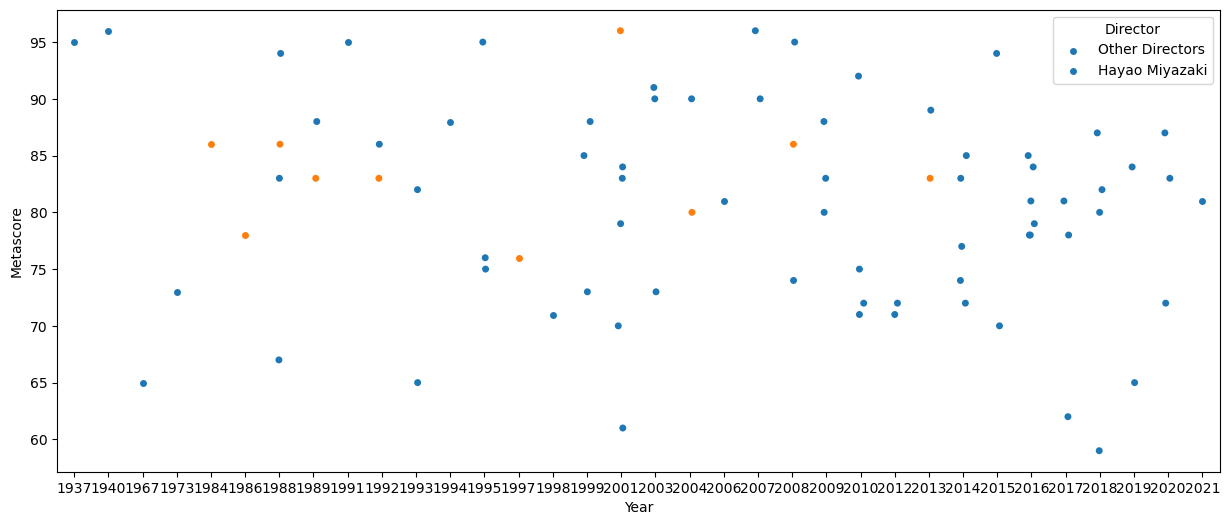

In [51]:
plt.figure(figsize=(15,6))
sns.stripplot(data=donnees, x=year, y=metascore, hue=(donnees['Director'] == 'Hayao Miyazaki'))
plt.legend(title='Director', labels=['Other Directors', 'Hayao Miyazaki'])

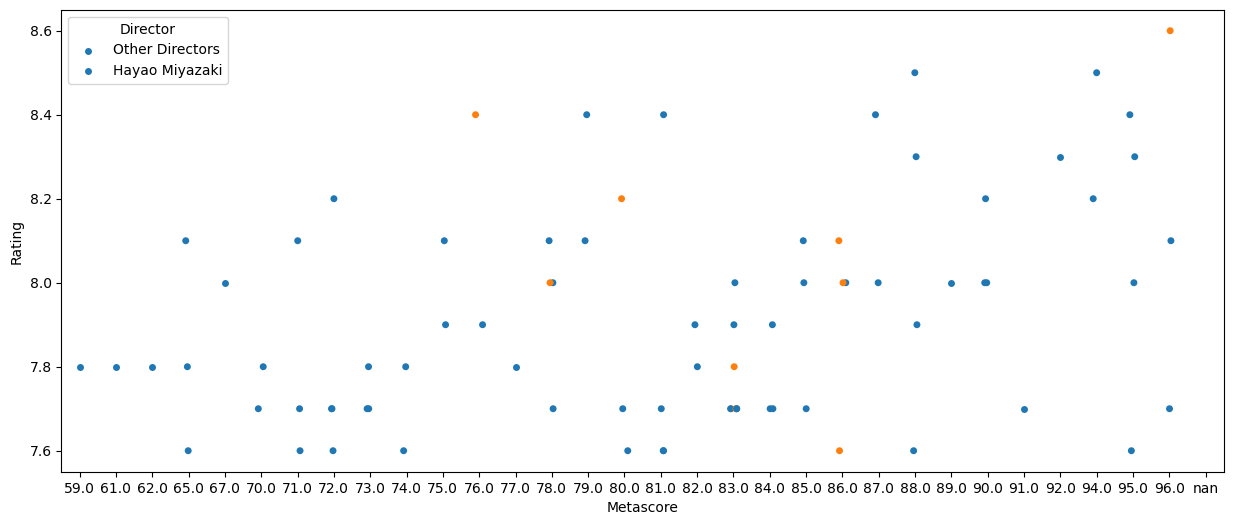

In [58]:
plt.figure(figsize=(15,6))
sns.stripplot(data=donnees, x=metascore, y=rating, hue=(donnees['Director'] == 'Hayao Miyazaki'))
plt.legend(title='Director', labels=['Other Directors', 'Hayao Miyazaki'])
plt.show()

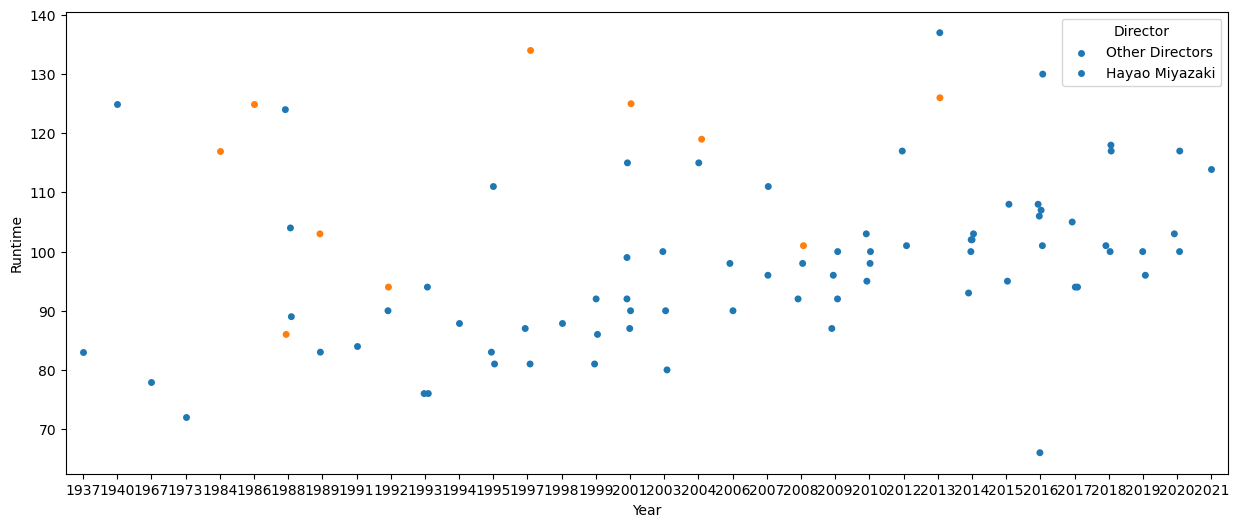

In [59]:
plt.figure(figsize=(15,6))
sns.stripplot(data=donnees, x=year, y=runtime, hue=(donnees['Director'] == 'Hayao Miyazaki'))
plt.legend(title='Director', labels=['Other Directors', 'Hayao Miyazaki'])
plt.show()


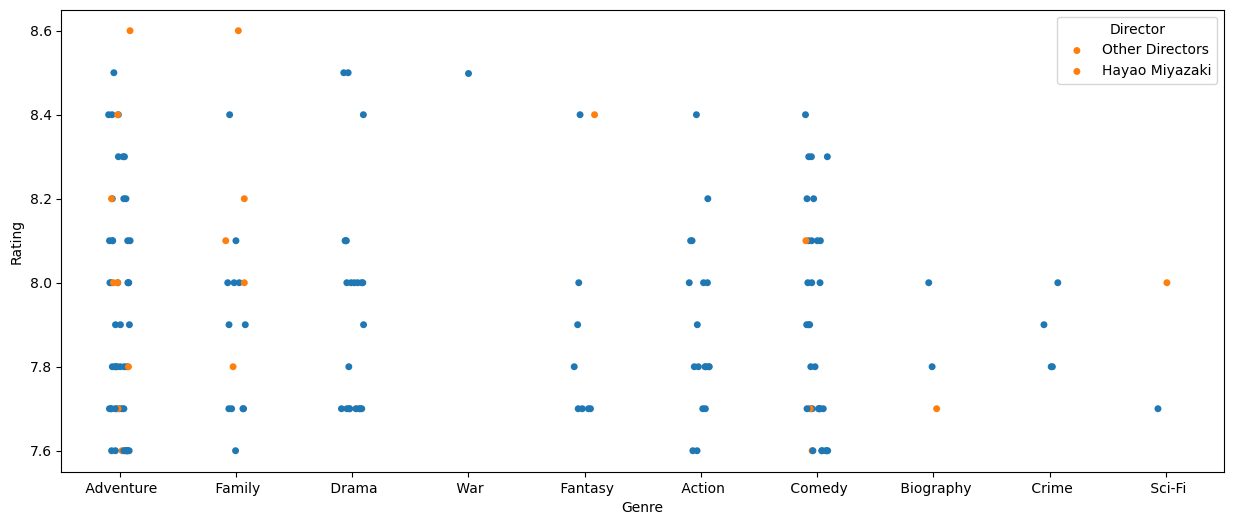

In [61]:
plt.figure(figsize=(15,6))
sns.stripplot(data=donnees, x=data['Genre'], y=rating, hue=(donnees['Director'] == 'Hayao Miyazaki'))
plt.legend(title='Director', labels=['Other Directors', 'Hayao Miyazaki'])
plt.show()

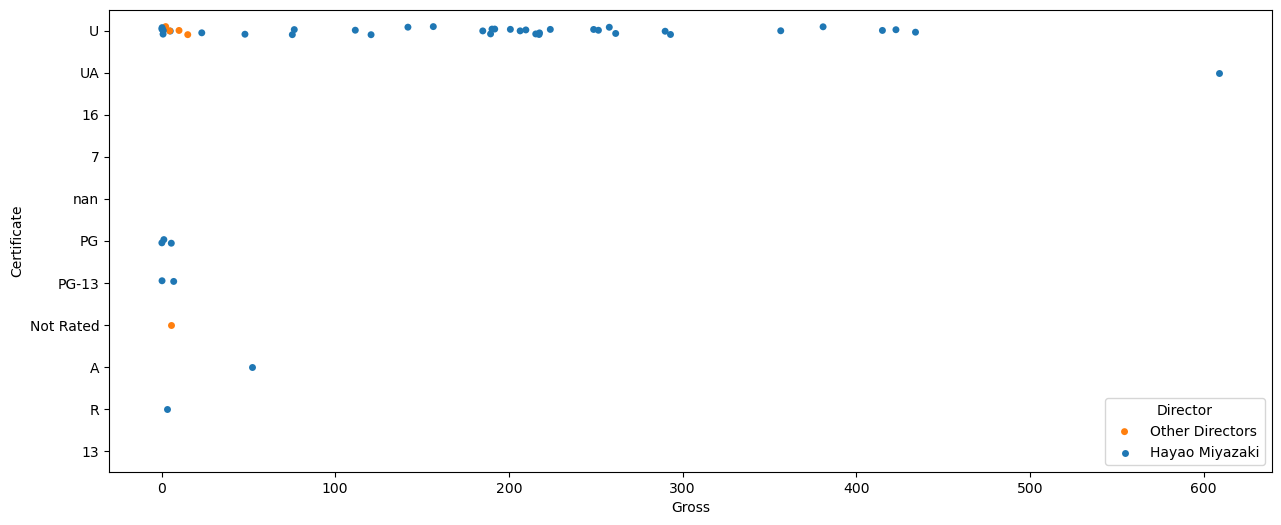

In [64]:
plt.figure(figsize=(15,6))
sns.stripplot(data=donnees, x=gross, y=certificate, hue=(donnees['Director'] == 'Hayao Miyazaki'))
plt.legend(title='Director', labels=['Other Directors', 'Hayao Miyazaki'])
plt.show()

C:\Users\daphn\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


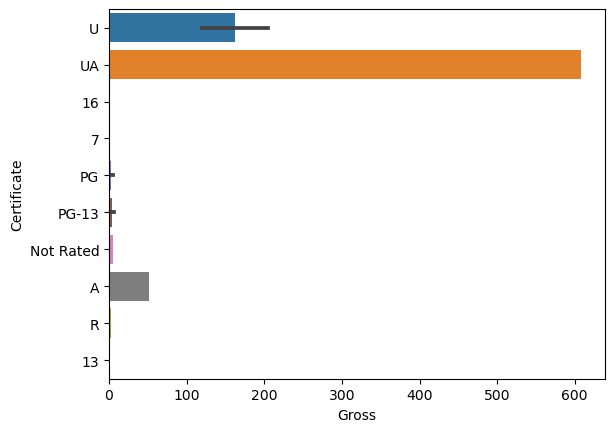

In [69]:
sns.barplot(data=data,x=gross, y=certificate)
plt.show()

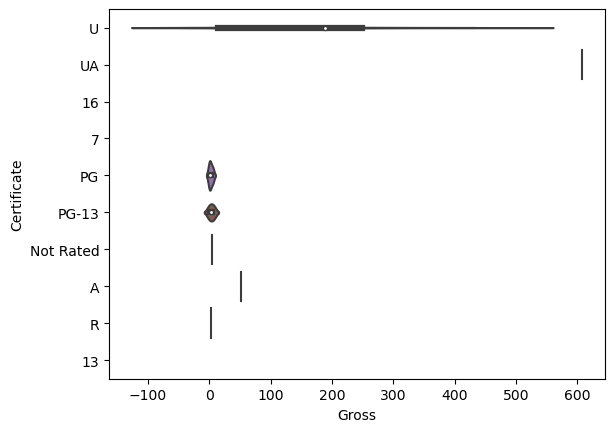

In [72]:
sns.violinplot(data=data,x=gross, y=certificate)
plt.show()

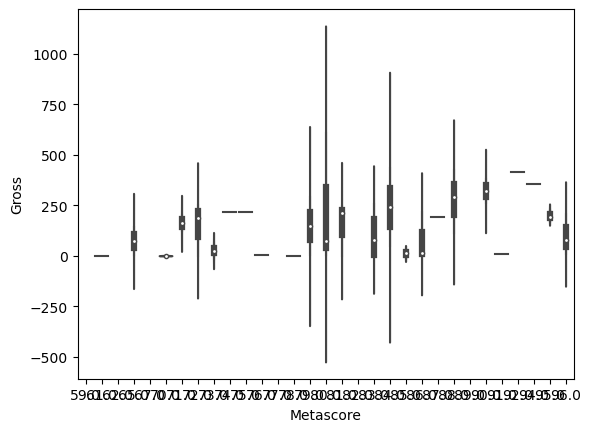

In [74]:
sns.violinplot(data=data,x=metascore, y=gross)
plt.show()

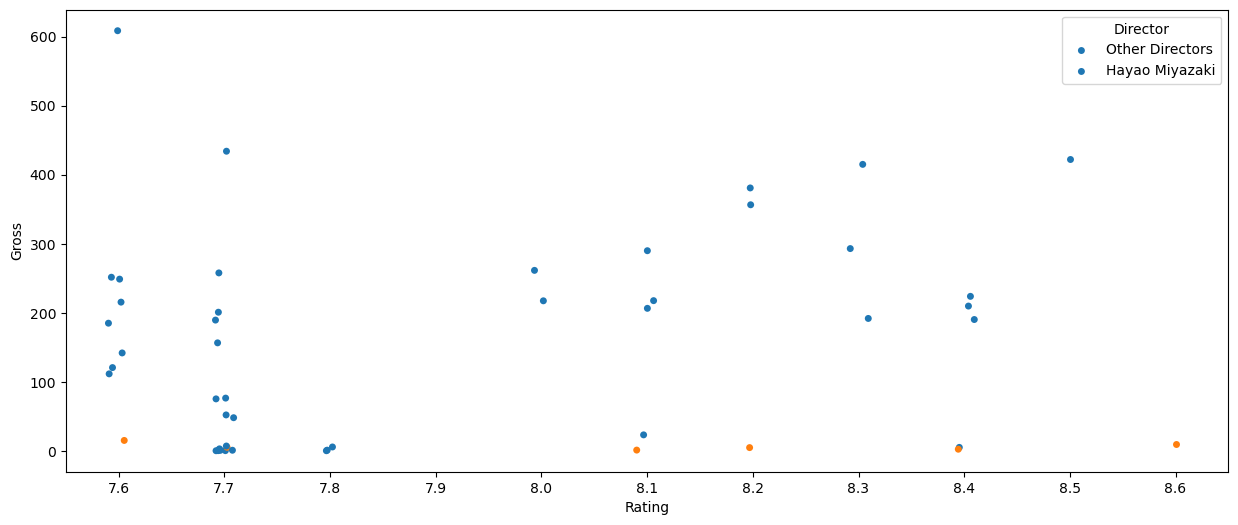

In [11]:

# plot genre histogram
plt.figure(figsize=(15,6))

sns.stripplot(data=donnees, x=rating, y=gross, hue=(donnees['Director'] == 'Hayao Miyazaki'))
plt.legend(title='Director', labels=['Other Directors', 'Hayao Miyazaki'])
plt.show()

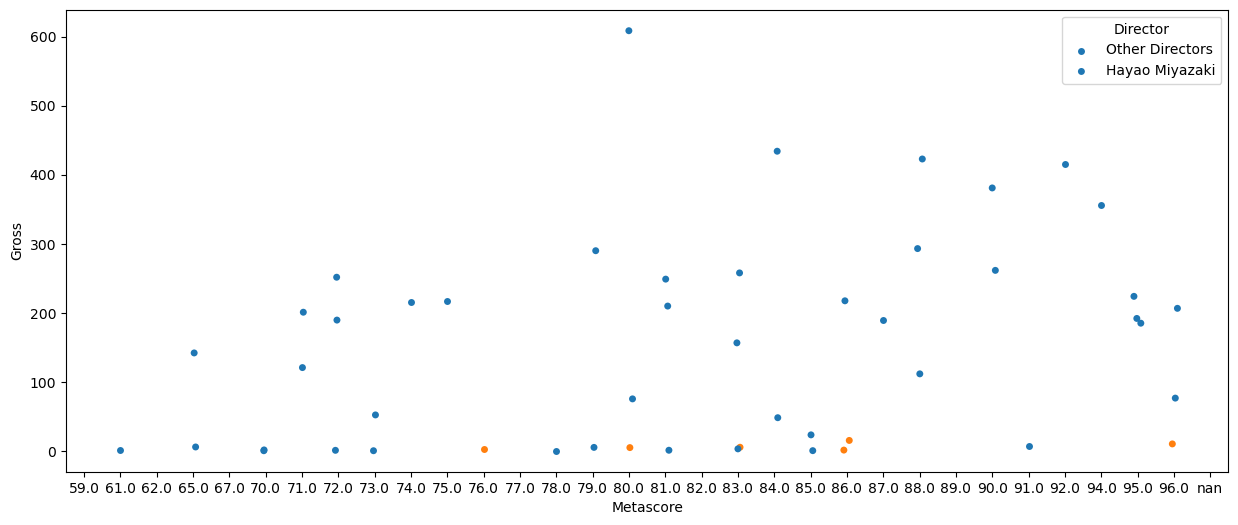

In [12]:
plt.figure(figsize=(15,6))

sns.stripplot(data=donnees, x=metascore, y=gross, hue=(donnees['Director'] == 'Hayao Miyazaki'))
plt.legend(title='Director', labels=['Other Directors', 'Hayao Miyazaki'])
plt.show()

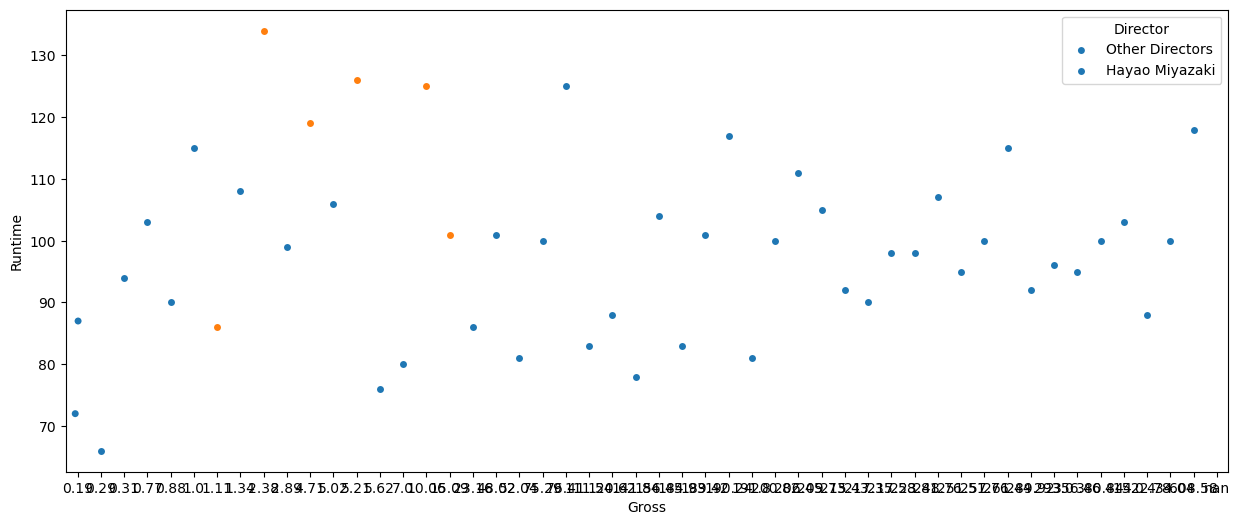

In [14]:
plt.figure(figsize=(15,6))

sns.stripplot(data=donnees, x=gross, y=runtime, hue=(donnees['Director'] == 'Hayao Miyazaki'))
plt.legend(title='Director', labels=['Other Directors', 'Hayao Miyazaki'])
plt.show()

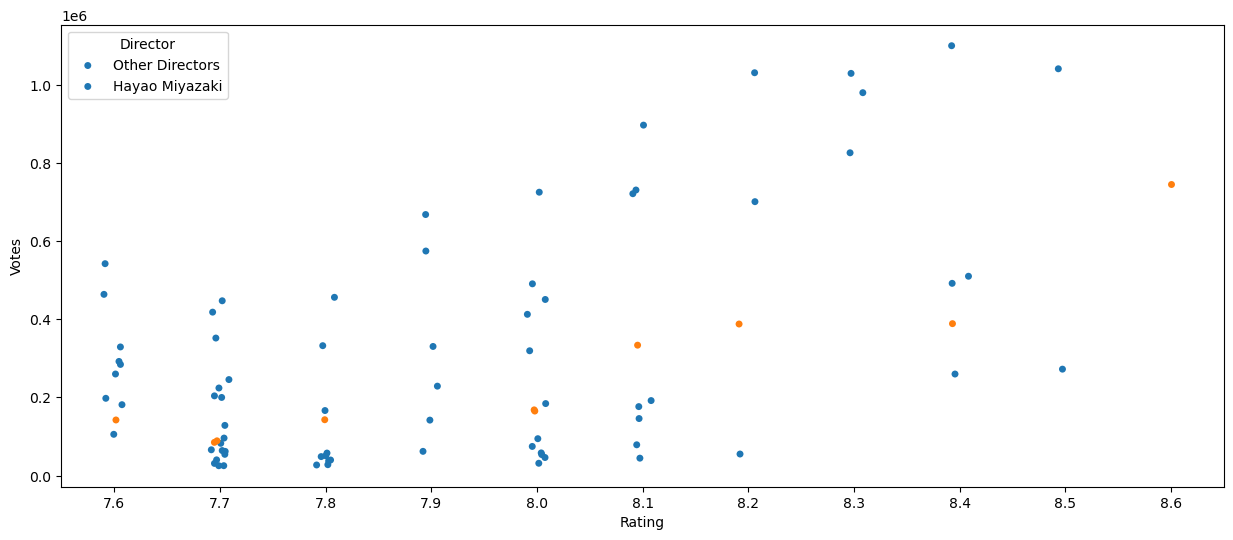

In [15]:
plt.figure(figsize=(15,6))

sns.stripplot(data=donnees, x=rating, y=votes, hue=(donnees['Director'] == 'Hayao Miyazaki'))
plt.legend(title='Director', labels=['Other Directors', 'Hayao Miyazaki'])
plt.show()

Moyenne de la durée des films : 99.3529411764706
Ecart-type de la durée des films : 14.63744861513728


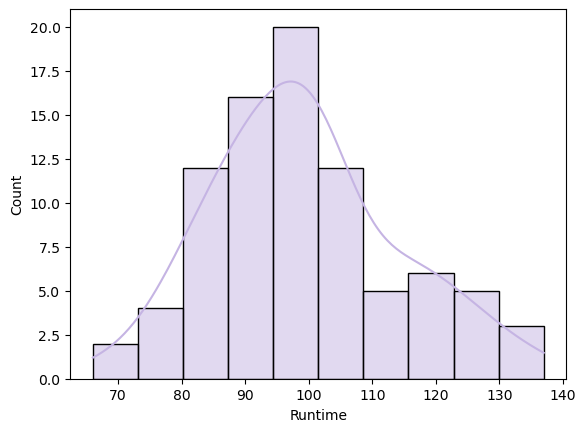

In [3]:

# plot
data['Runtime'] = data['Runtime'].apply(lambda x: int(x.split()[0]))
# Loi de distribution avec seaborn
sns.histplot(data['Runtime'], kde=True, color='#C5B4E3', bins=10)
# calcul de la moyenne
mean = data['Runtime'].mean()
print("Moyenne de la durée des films :", mean)
std = data['Runtime'].std()
print("Ecart-type de la durée des films :", std)

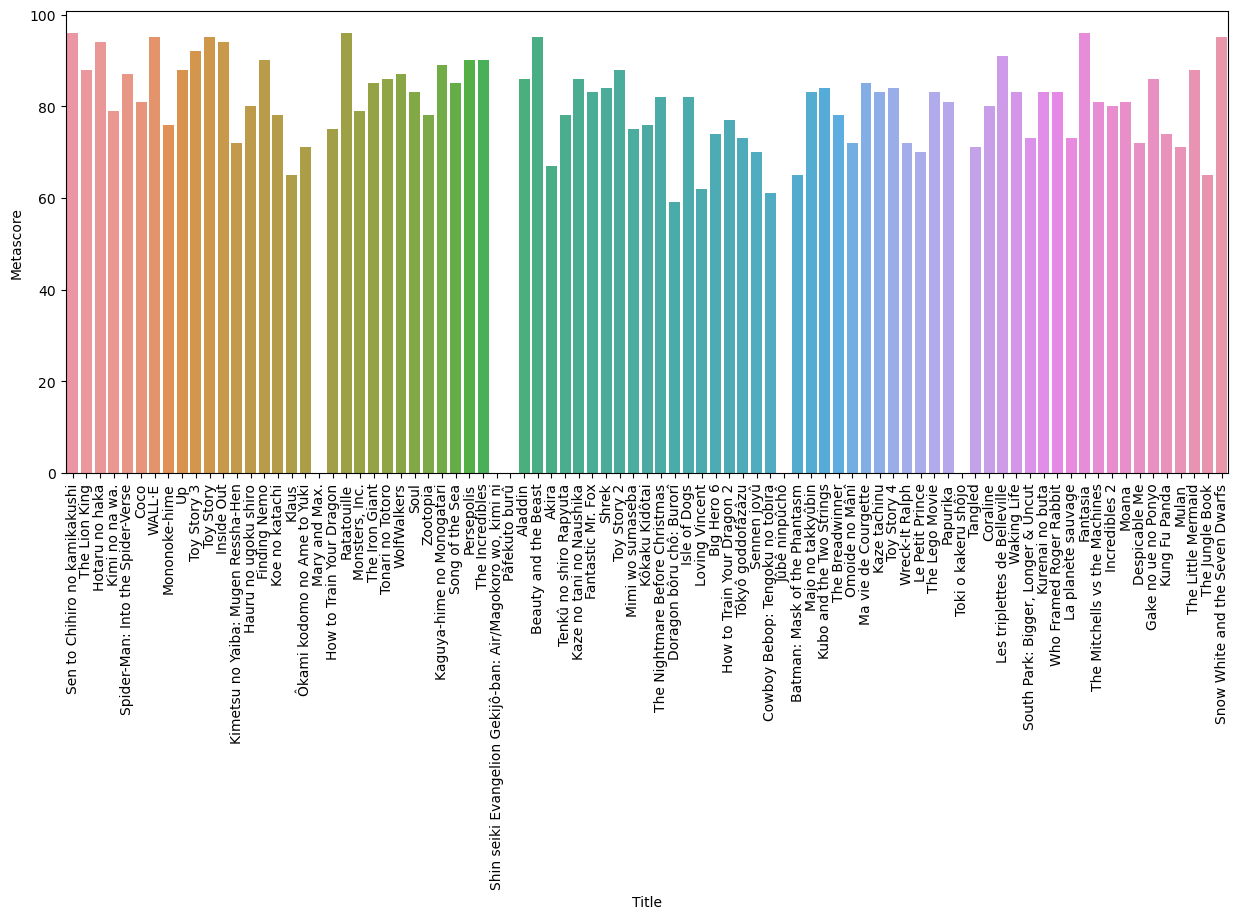

In [12]:
plt.figure(figsize=(15,6))
sns.barplot(data=data,x=data['Title'], y=metascore)
plt.xticks(rotation=90)
plt.show()

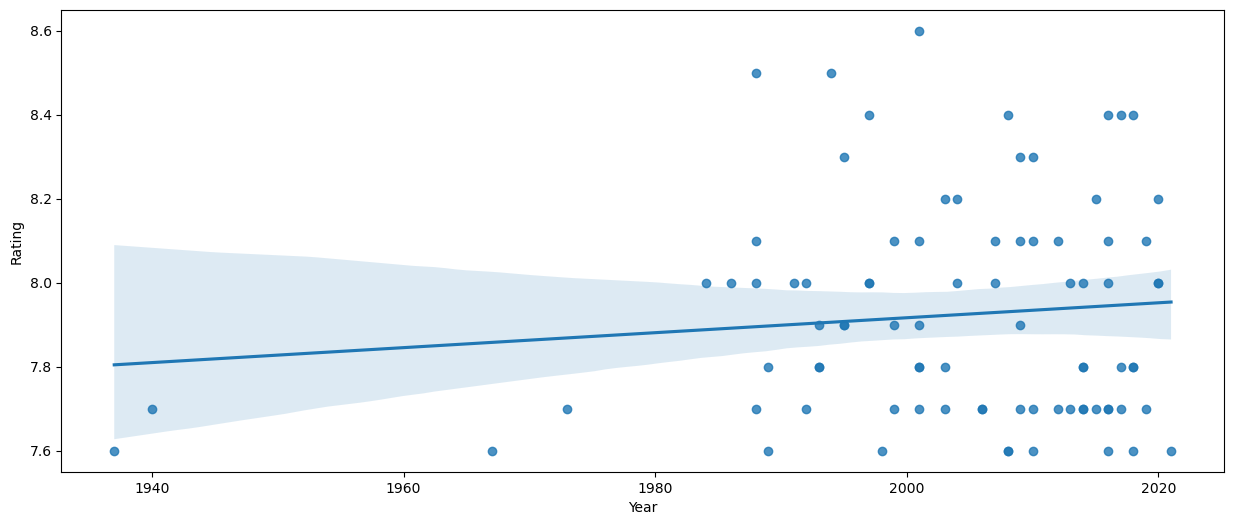

In [14]:
plt.figure(figsize=(15,6))
sns.regplot(data=data,x=year, y=rating)
plt.show()

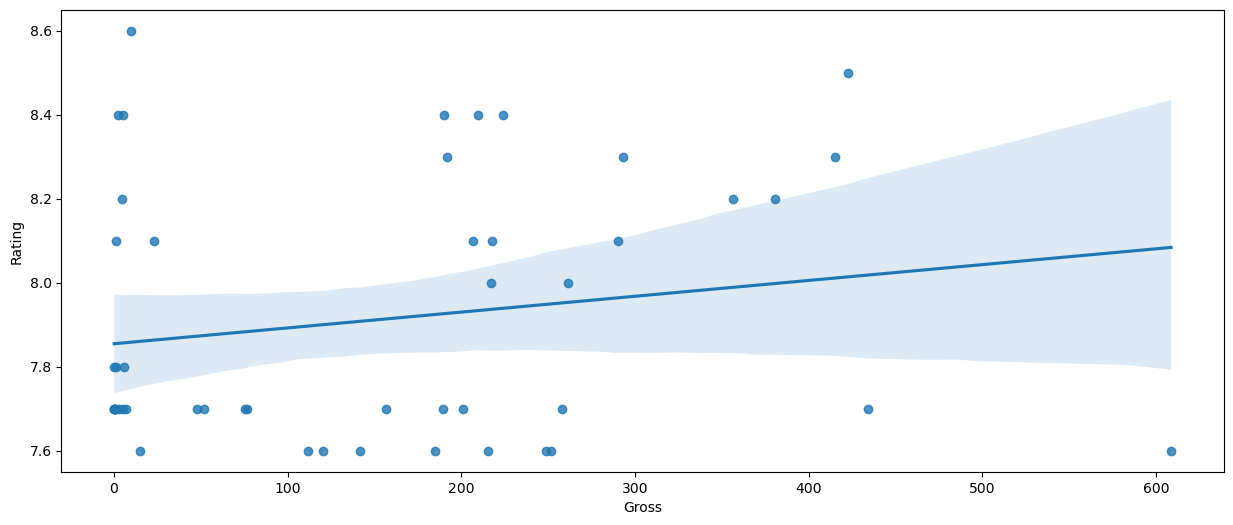

In [15]:
plt.figure(figsize=(15,6))
sns.regplot(data=data,x=gross, y=rating)
plt.show()

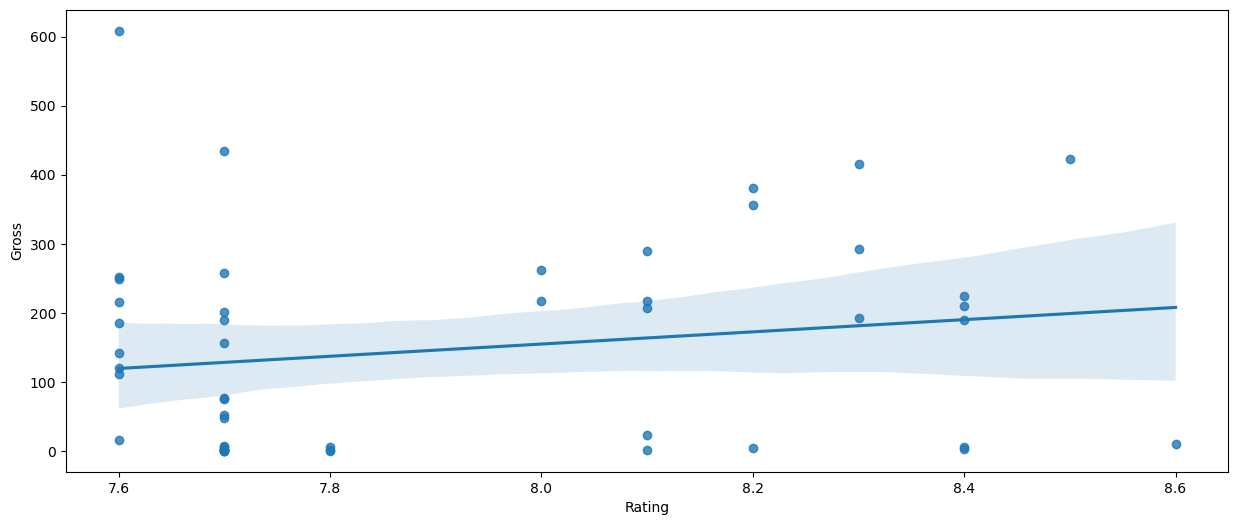

In [16]:
plt.figure(figsize=(15,6))
sns.regplot(data=data,x=rating, y=gross)
plt.show()

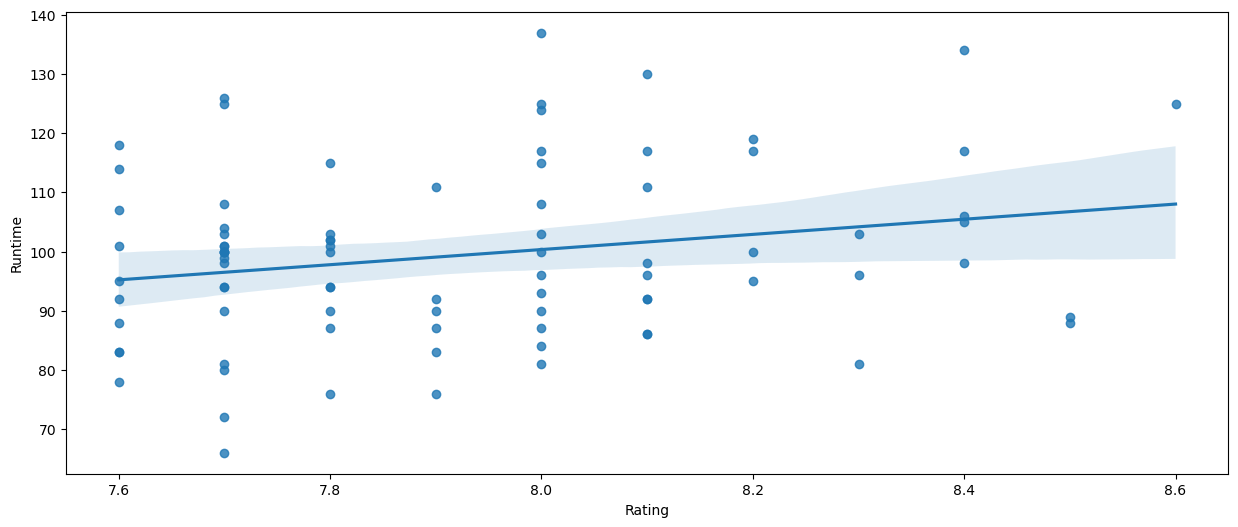

In [17]:
plt.figure(figsize=(15,6))
sns.regplot(data=data,x=rating, y=runtime)
plt.show()

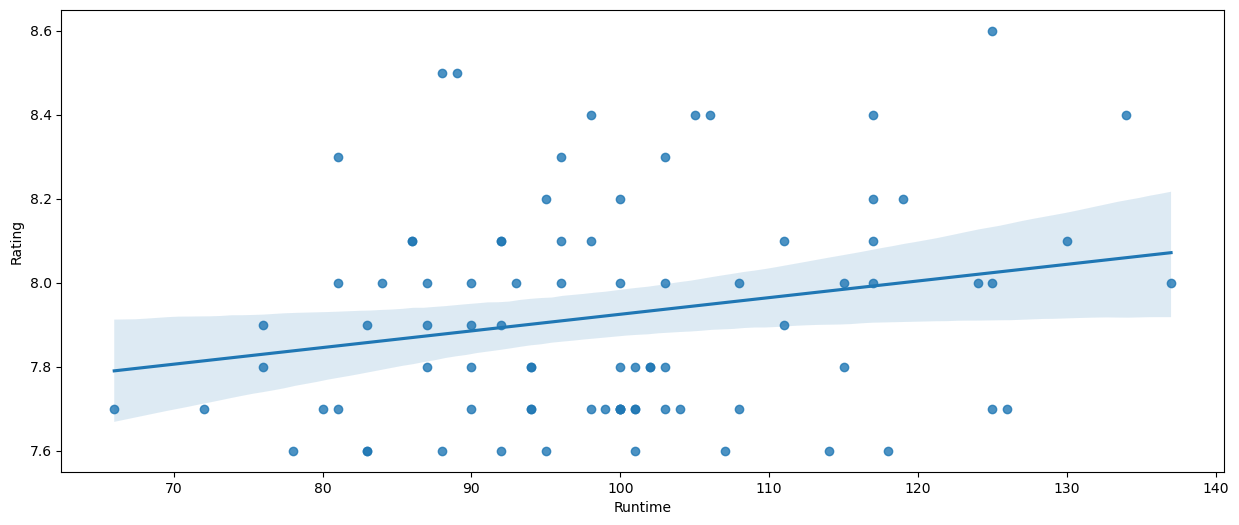

In [18]:
plt.figure(figsize=(15,6))
sns.regplot(data=data,x=runtime, y=rating)
plt.show()

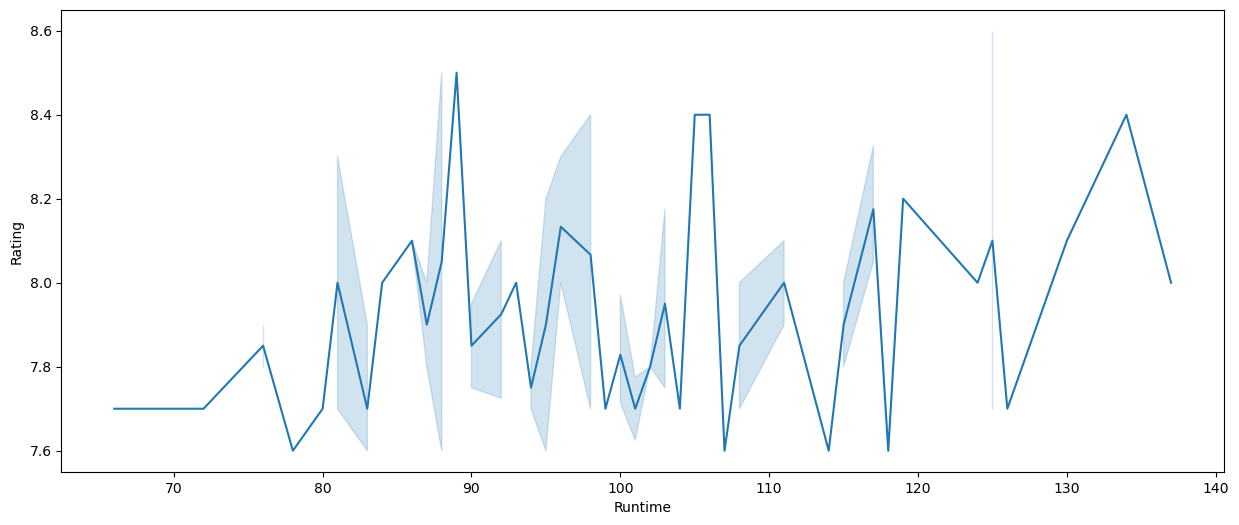

In [21]:
plt.figure(figsize=(15,6))
sns.lineplot(data=data,x=runtime, y=rating)

plt.show()

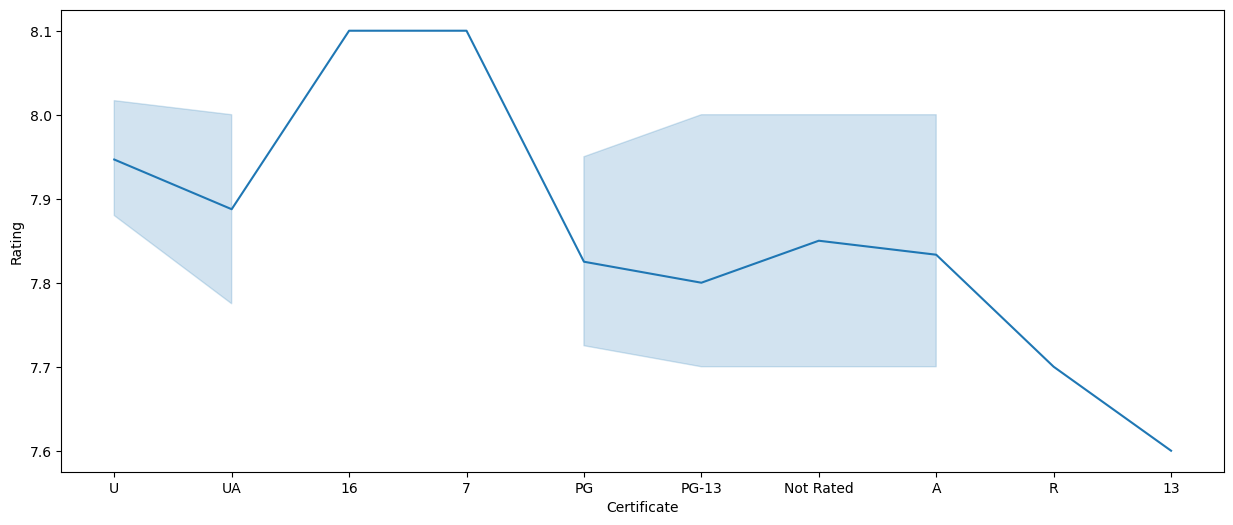

In [22]:
plt.figure(figsize=(15,6))
sns.lineplot(data=data,x=certificate, y=rating)

plt.show()

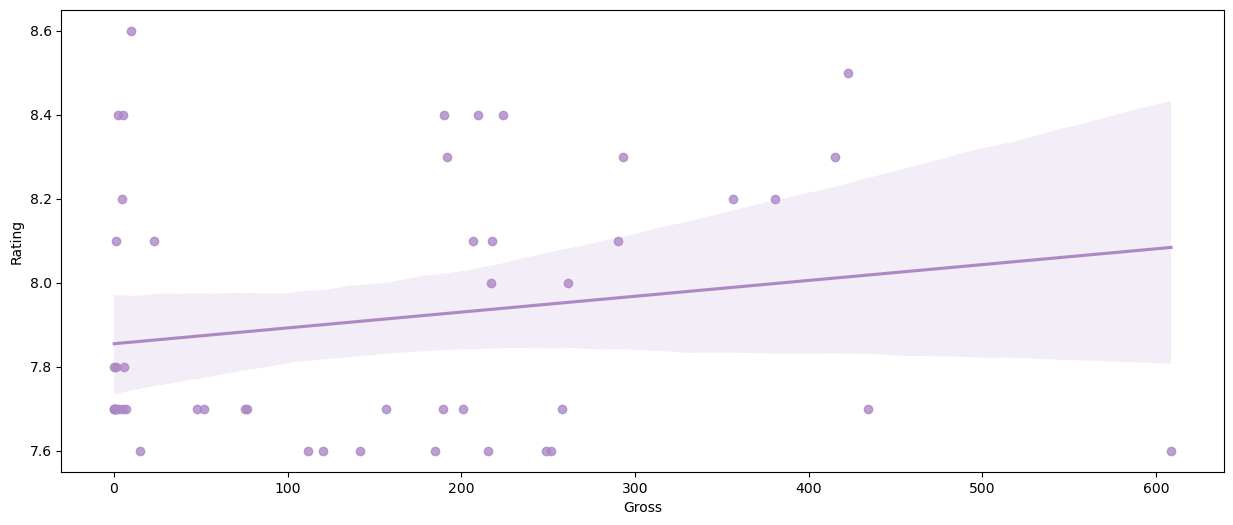

In [38]:
plt.figure(figsize=(15,6))
sns.regplot(data=data,x=gross, y=rating,color="#AD88C6")
plt.show()

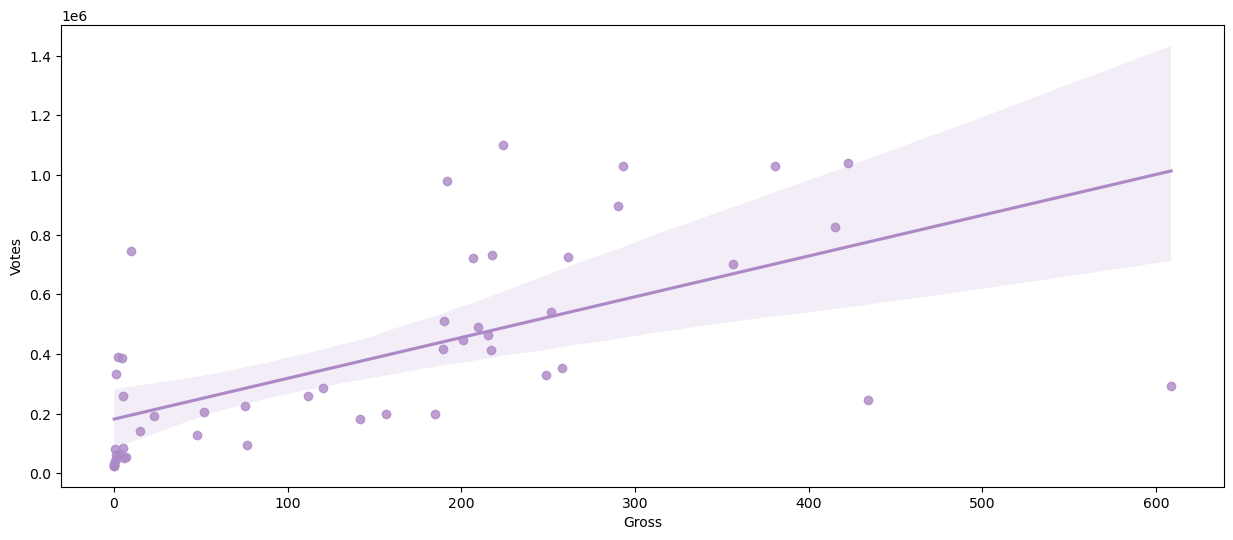

In [37]:
plt.figure(figsize=(15,6))
sns.regplot(data=data,x=gross, y=votes,color="#AD88C6")
plt.show()

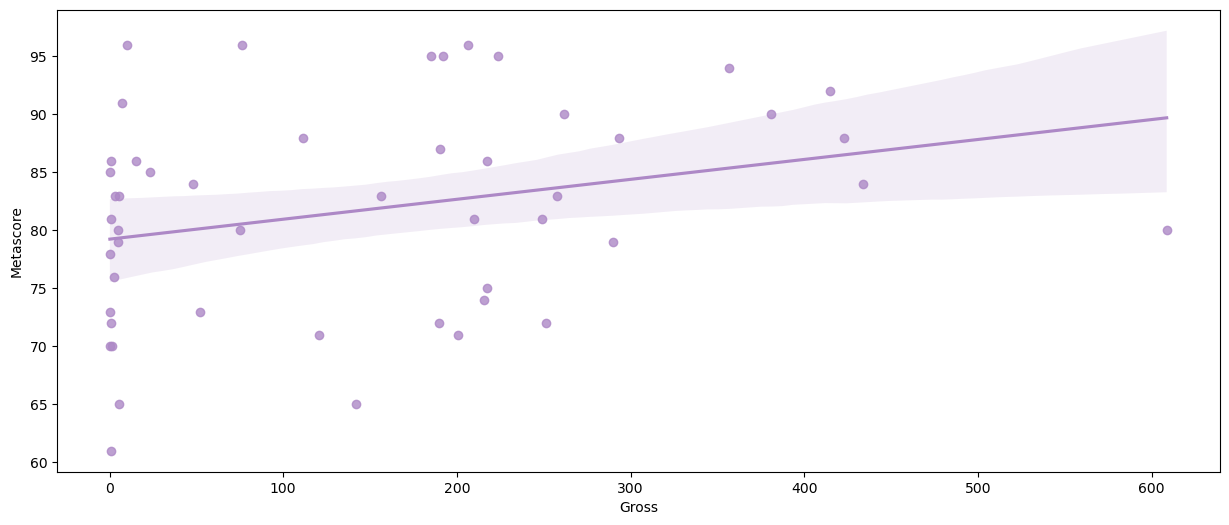

In [39]:
plt.figure(figsize=(15,6))
sns.regplot(data=data,x=gross, y=metascore,color="#AD88C6")
plt.show()

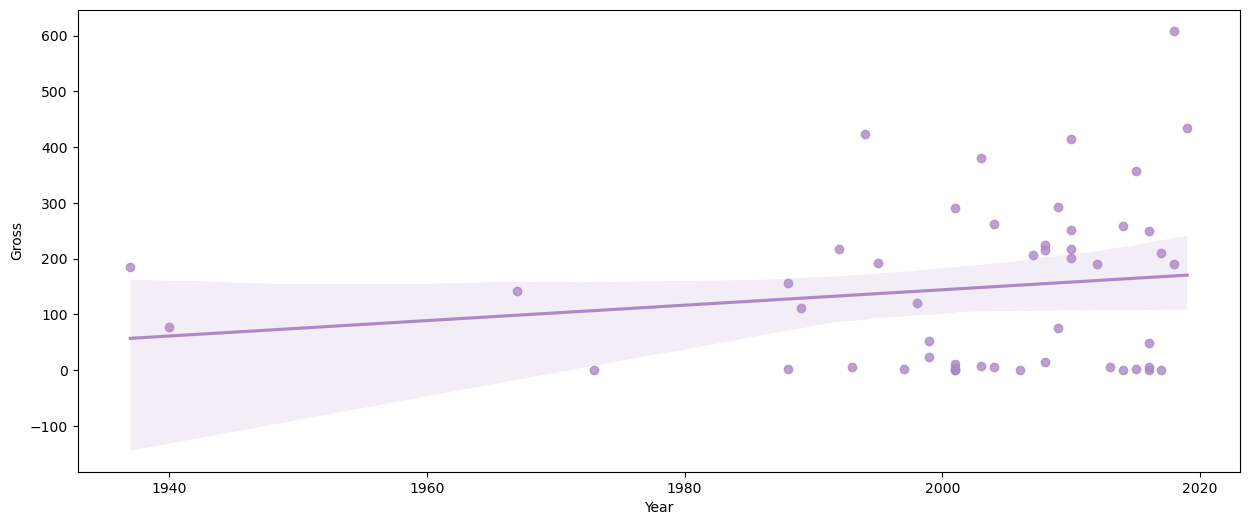

In [41]:
plt.figure(figsize=(15,6))
sns.regplot(data=data,x=year, y=gross,color="#AD88C6")
plt.show()

C:\Users\daphn\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


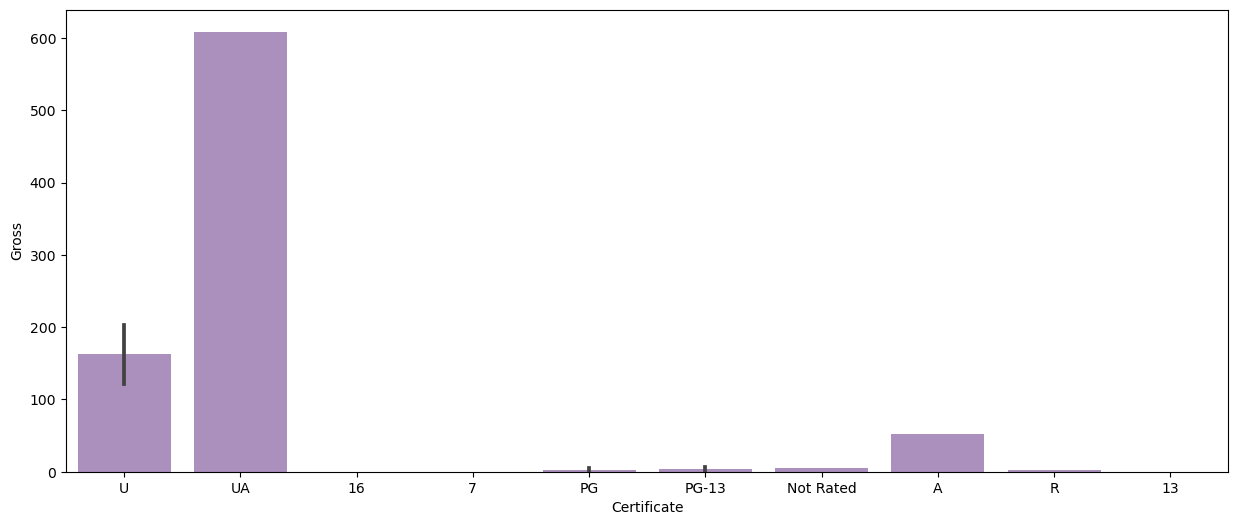

In [104]:
plt.figure(figsize=(15,6))
sns.barplot(data=data,x=certificate, y=gross,color="#AD88C6")
plt.show()

C:\Users\daphn\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\daphn\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


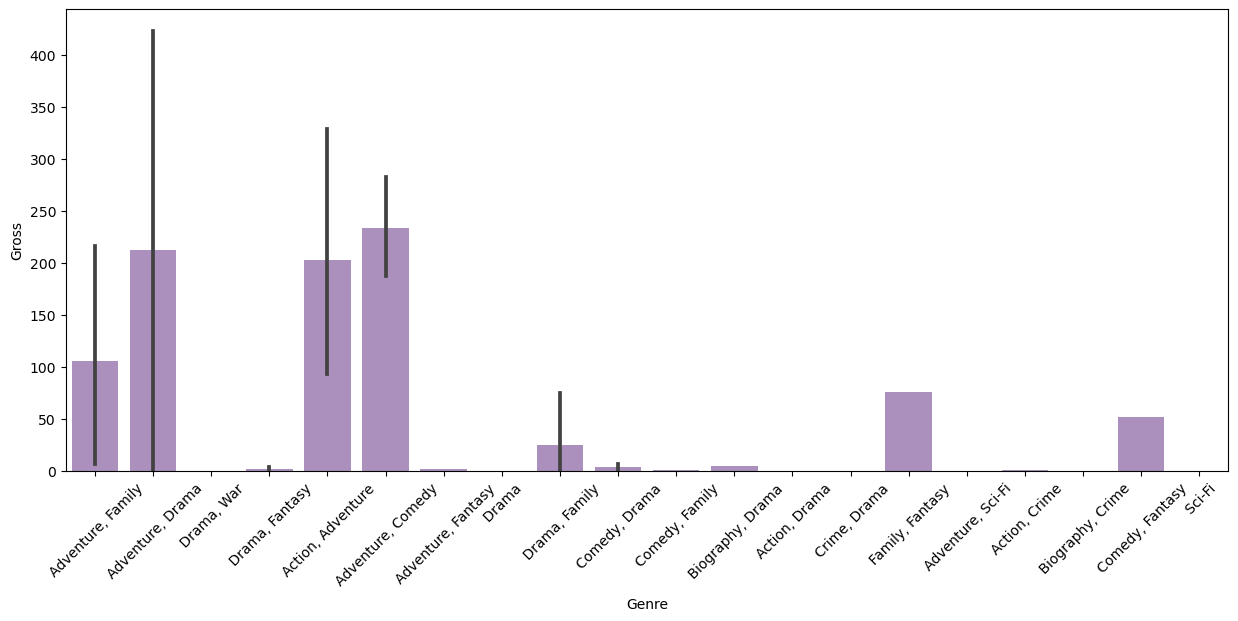

In [106]:
plt.figure(figsize=(15,6))
sns.barplot(data=data,x=genre, y=gross,color="#AD88C6")
plt.xticks(rotation=45)
plt.show()

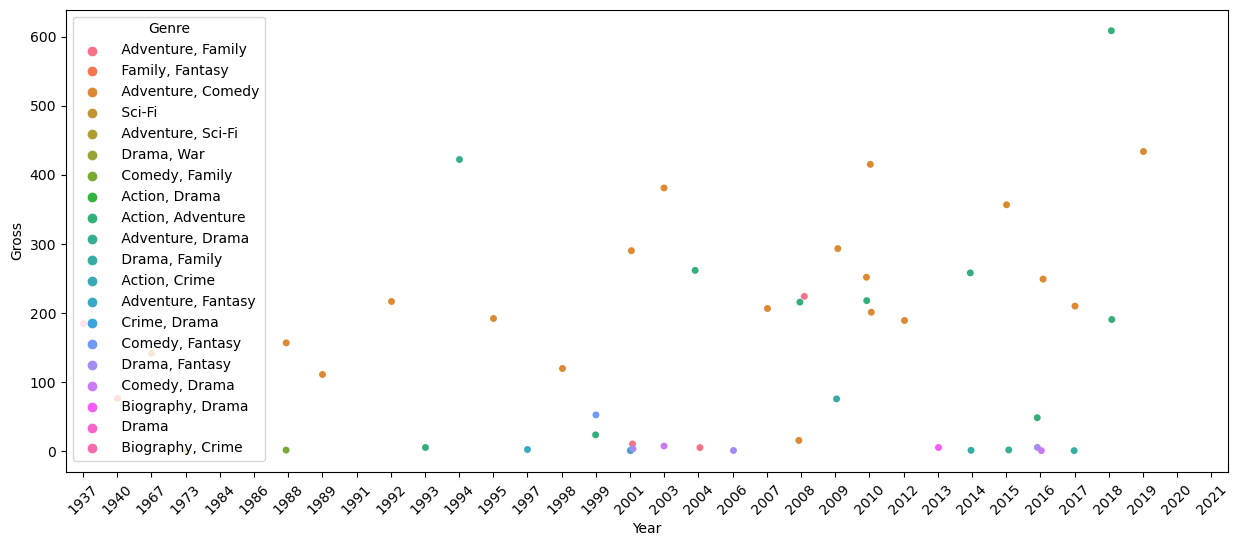

In [50]:
plt.figure(figsize=(15,6))

sns.stripplot(data=donnees, x=year, y=gross, hue=donnees['Genre'])
plt.xticks(rotation=45)
plt.show()

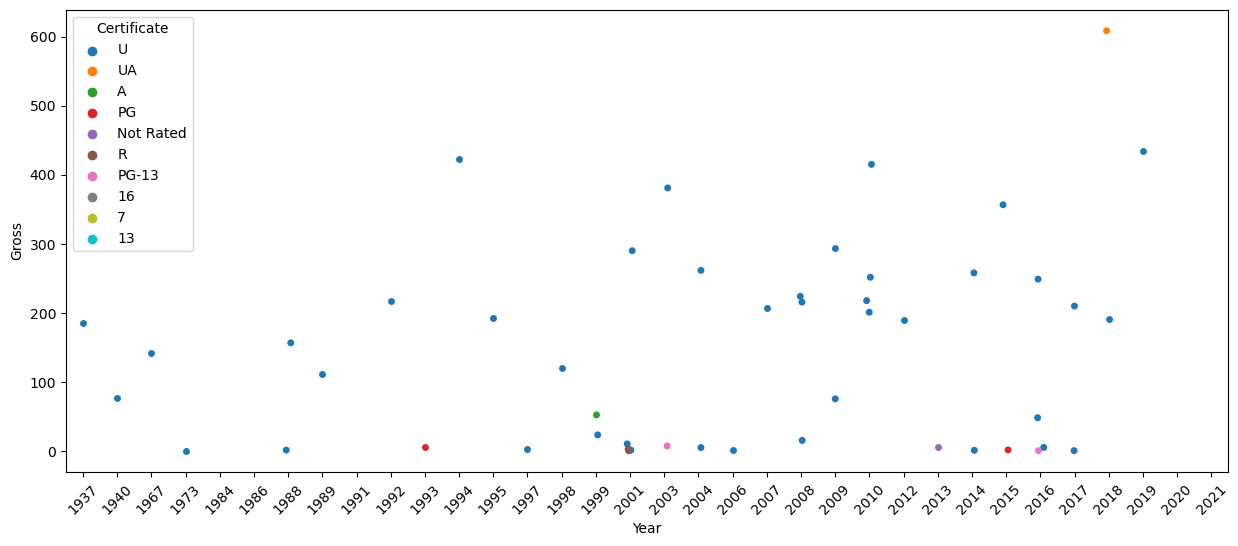

In [51]:
plt.figure(figsize=(15,6))

sns.stripplot(data=donnees, x=year, y=gross, hue=certificate)
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Director', ylabel='Gross'>

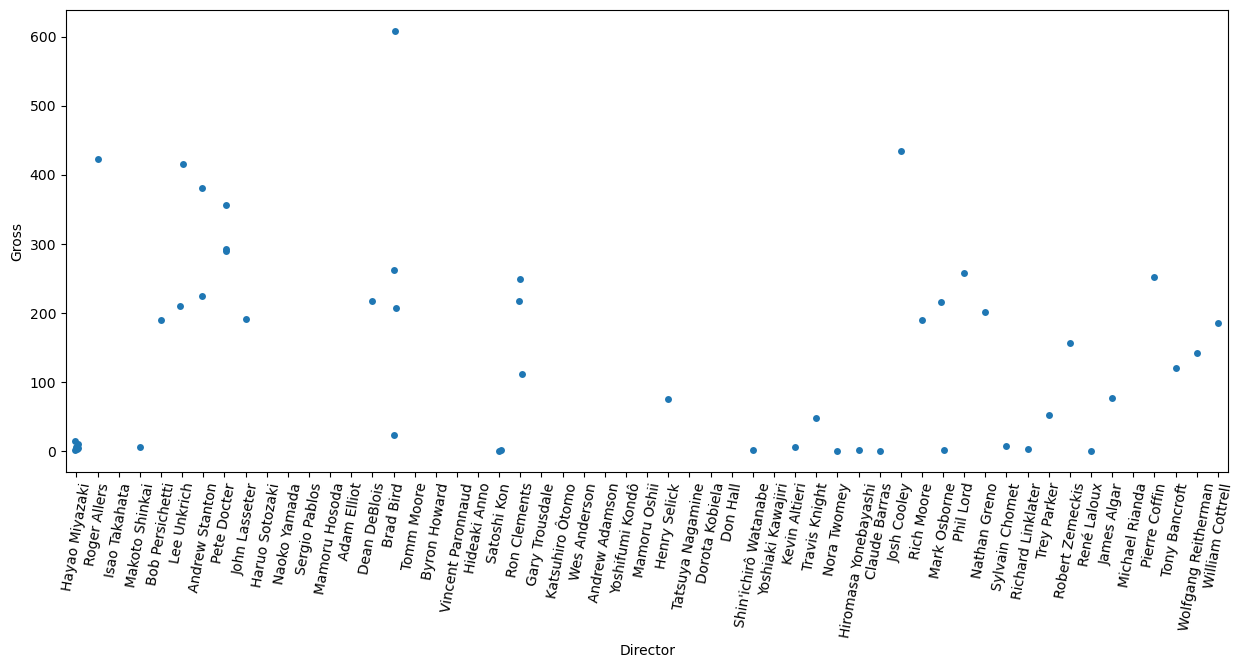

In [95]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=80)
sns.stripplot(data=donnees,x=director, y=gross)

<Axes: xlabel='Year', ylabel='Gross'>

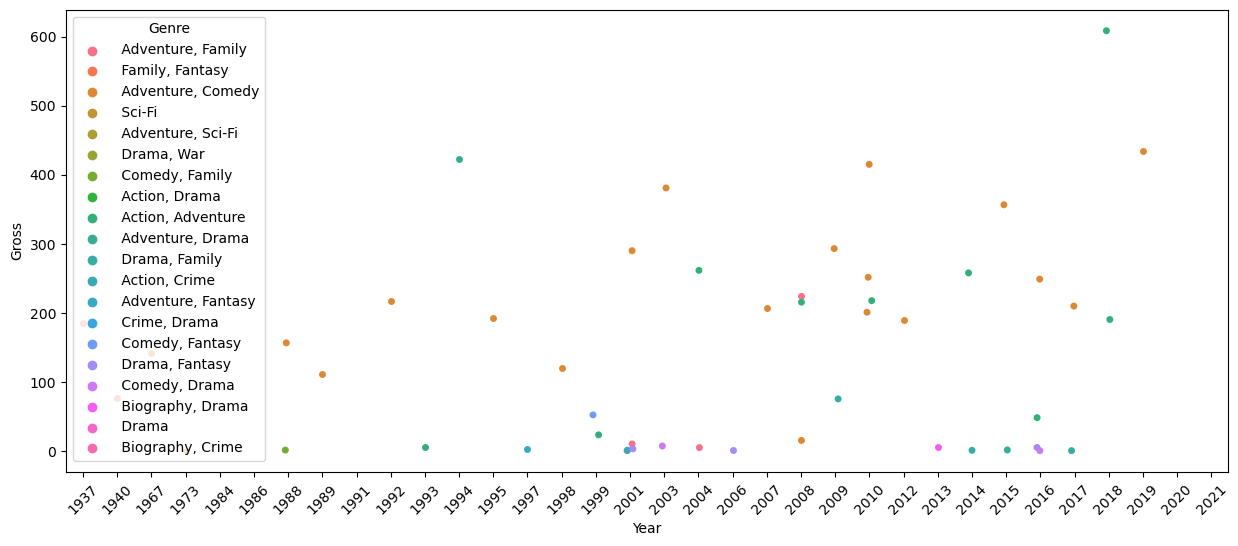

In [103]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
sns.stripplot(data=data,x=year,y=gross,hue=donnees['Genre'])

<Axes: xlabel='Runtime', ylabel='Gross'>

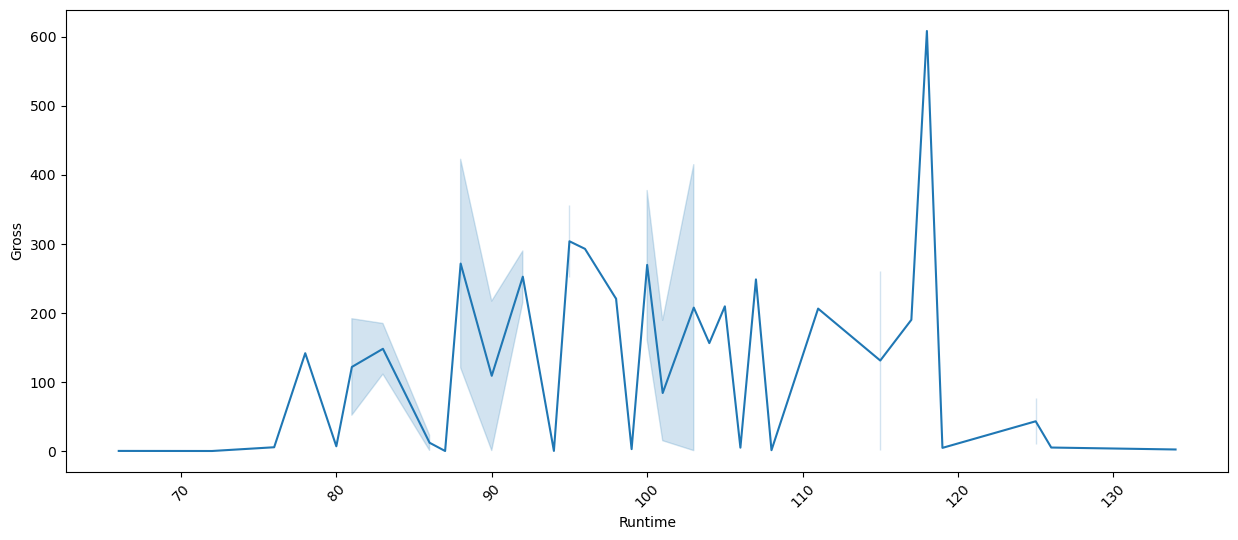

In [97]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
sns.lineplot(data=donnees,x=runtime,y=gross)